In [37]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.rcParams['figure.dpi'] = 200

In [27]:
data = pd.read_csv('iris.data',header=None)

In [28]:
X = data.iloc[:,:4].to_numpy()
labels = data.iloc[:,4].to_numpy()

In [29]:
le = preprocessing.LabelEncoder()
Y = le.fit_transform(labels)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

In [9]:
clf = LinearDiscriminantAnalysis()
y_pred = clf.fit(X_train, y_train).predict(X_test)

print('Wrong classified:', (y_test != y_pred).sum())

Wrong classified: 2


In [11]:
print('Accuracy:', clf.score(X_test, y_test))

Accuracy: 0.9733333333333334


In [12]:
def plot_clf(clf, title=""):
    test_sizes = np.arange(0.05, 0.95, 0.05)
    wrong_results = []
    accuracies = []

    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=630414)
        y_pred = clf.fit(X_train, y_train).predict(X_test)
        wrong_results.append((y_test != y_pred).sum())
        accuracies.append(clf.score(X_test, y_test))


    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].plot(test_sizes, wrong_results, label = "Wrong classified")
    axs[1].plot(test_sizes, accuracies, label = "Accuracy")
    axs[0].legend()
    axs[1].legend()
    axs[0].set_xlabel(title)
    axs[1].set_xlabel(title)
    plt.tight_layout()
    plt.show()
    max_acc_index = accuracies.index(np.max(accuracies))
    print(wrong_results[max_acc_index])
    print(np.max(accuracies))

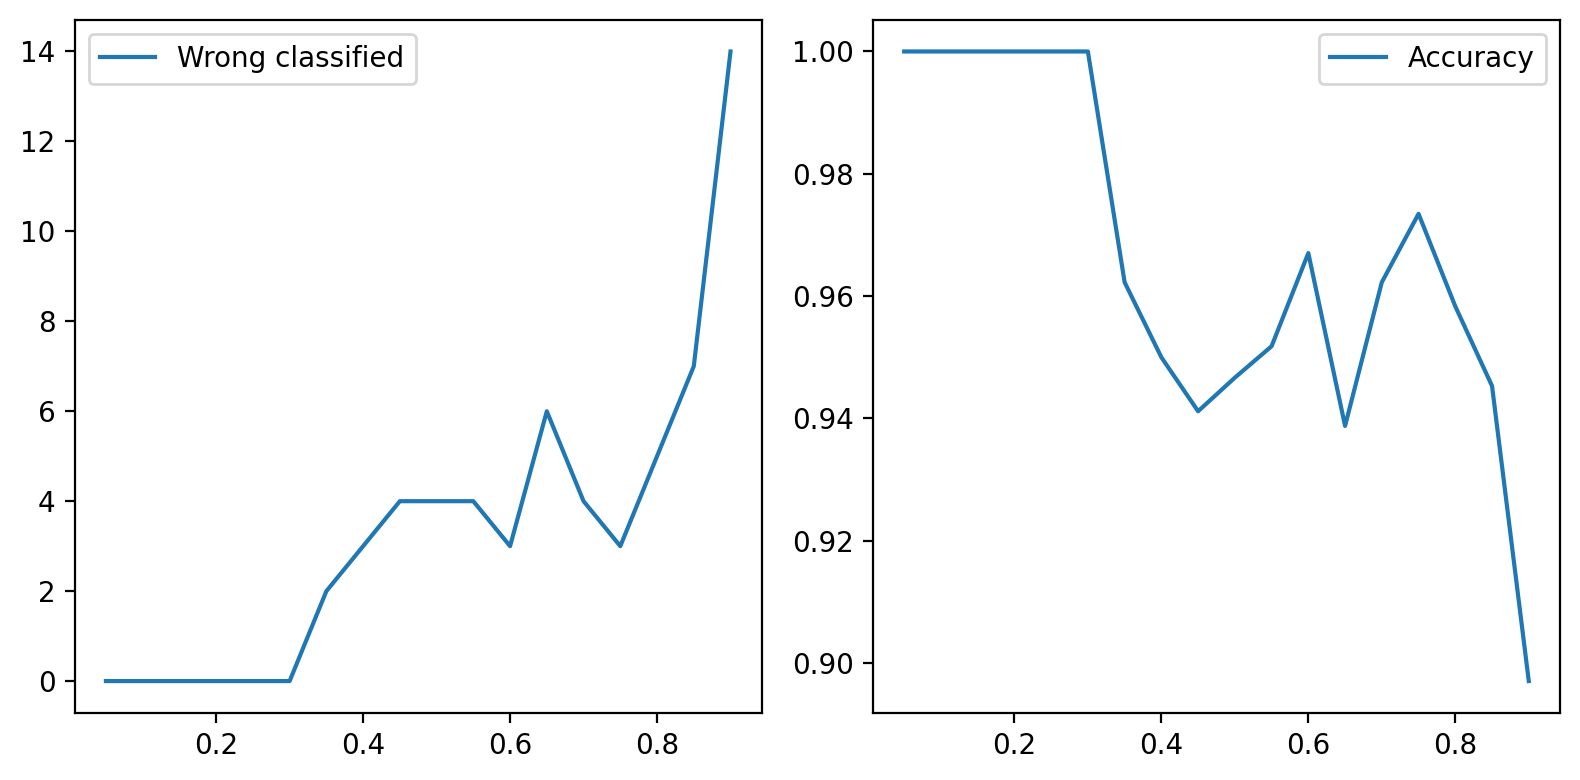

0
1.0


In [15]:
plot_clf(clf)

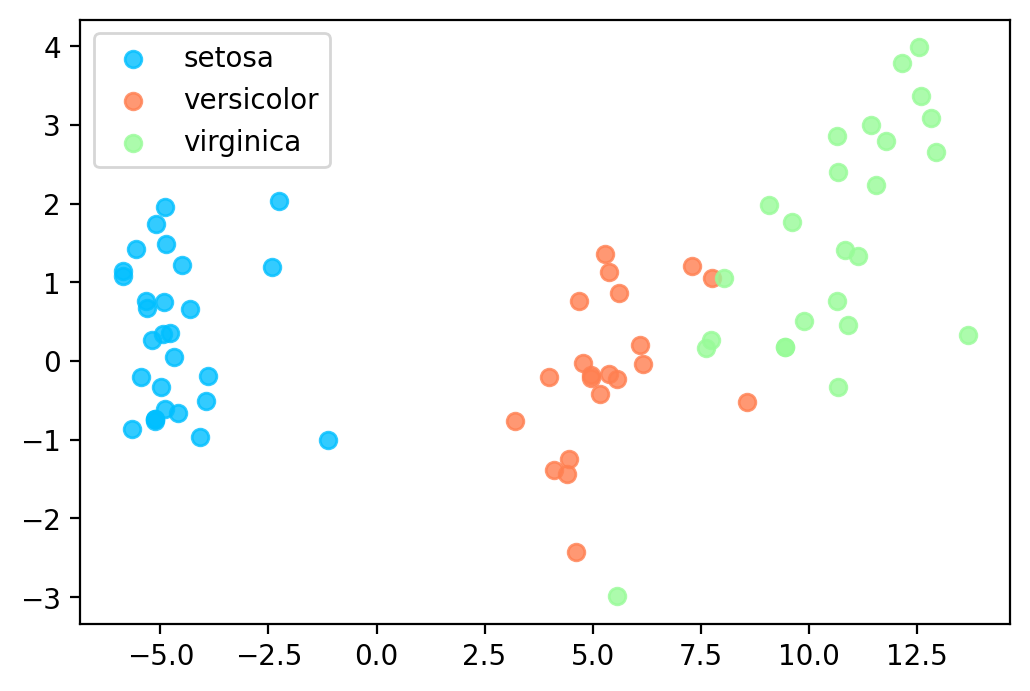

In [24]:
data_transformed = clf.transform(X_train)

labels = ['setosa', 'versicolor', 'virginica']

plt.figure()

colors = ['deepskyblue', 'coral', 'palegreen']
lw = 2

for color, i, label_ in zip(colors, [0, 1, 2], labels):
    plt.scatter(data_transformed[y_train == i, 0], data_transformed[y_train == i, 1], alpha=.8, color=color,
                label=label_)
plt.legend(loc='best', shadow=False, scatterpoints=1)

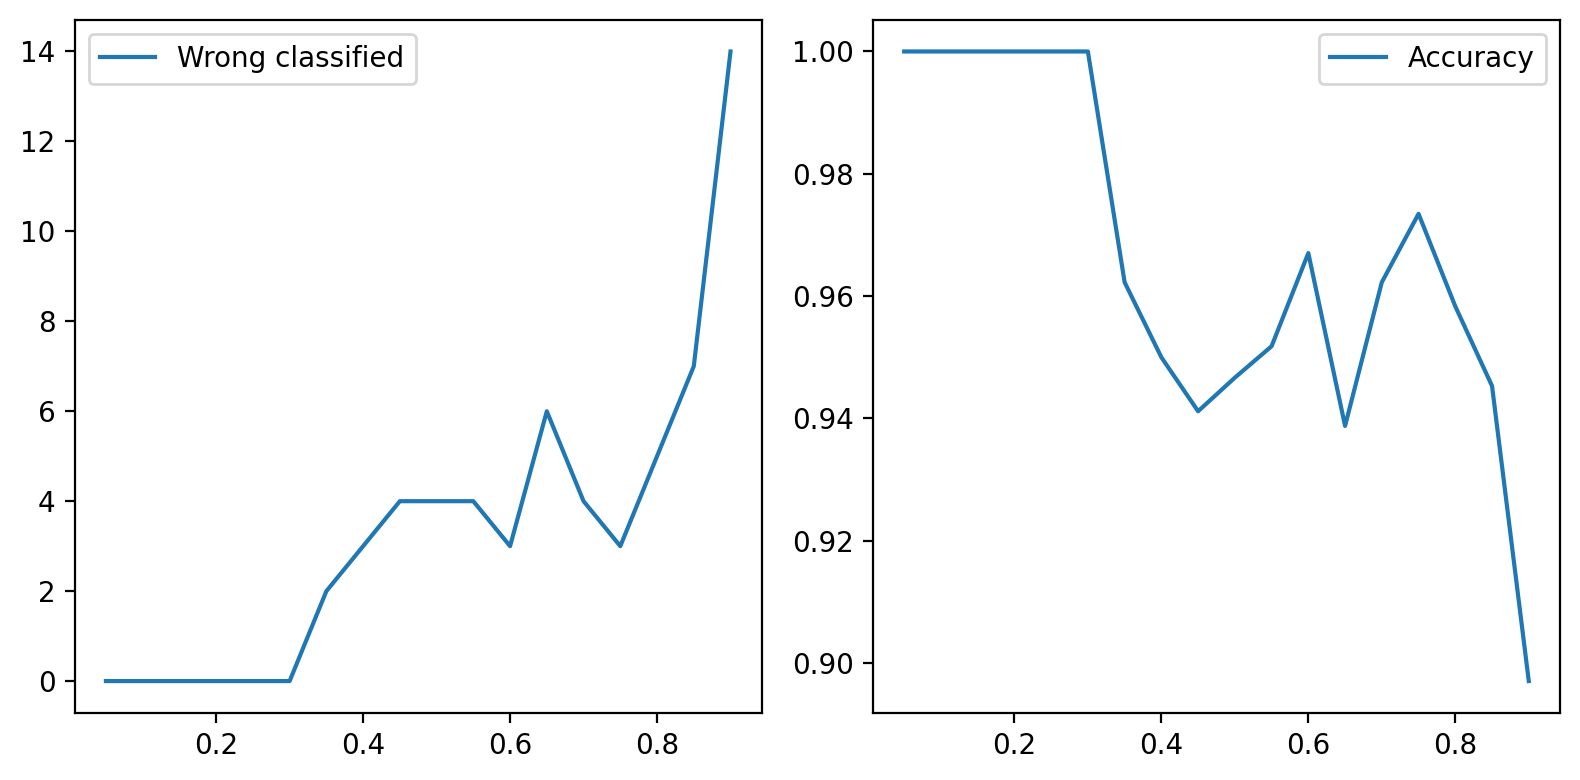

0
1.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "


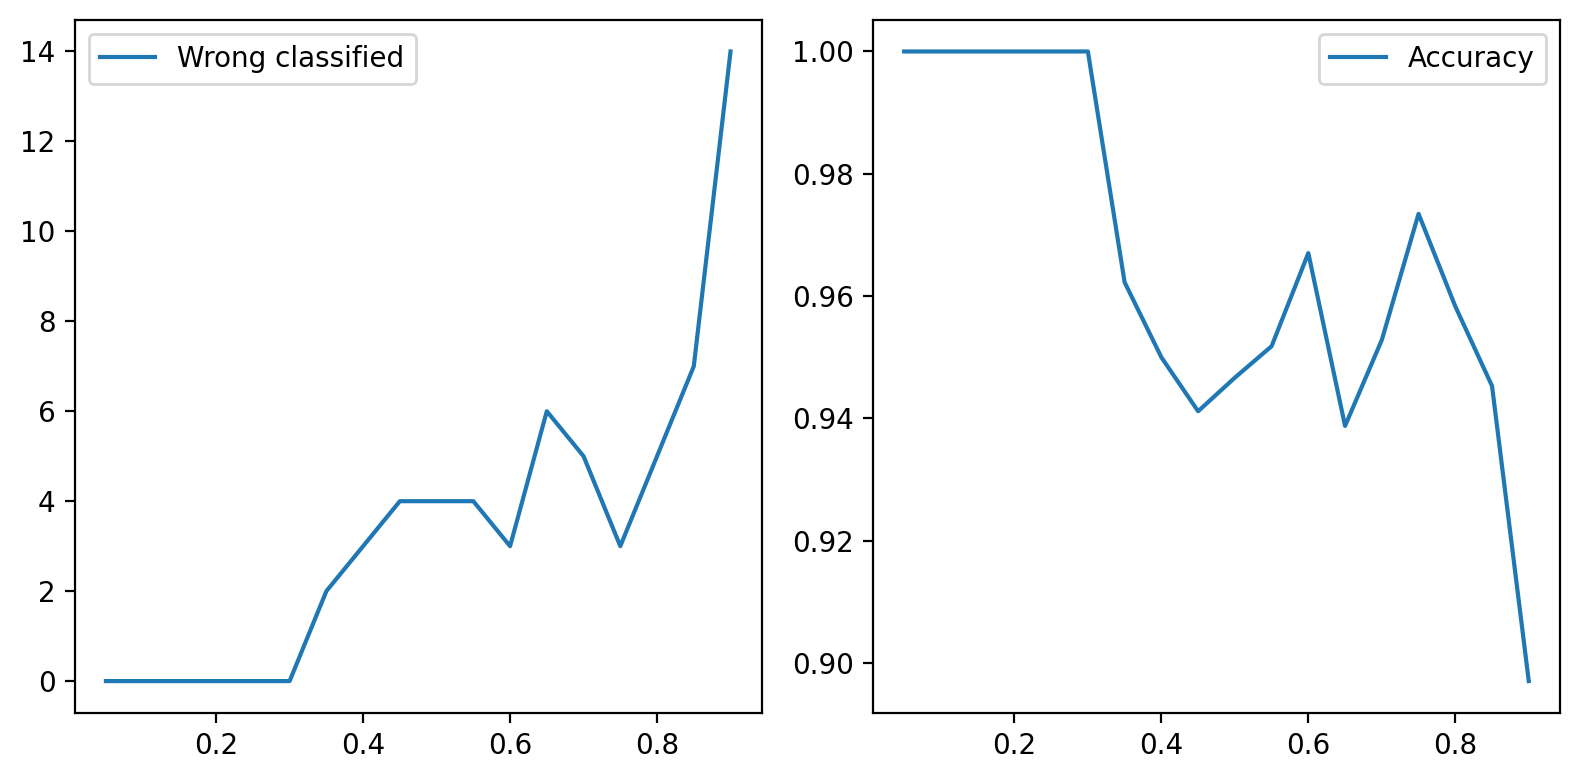

0
1.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "


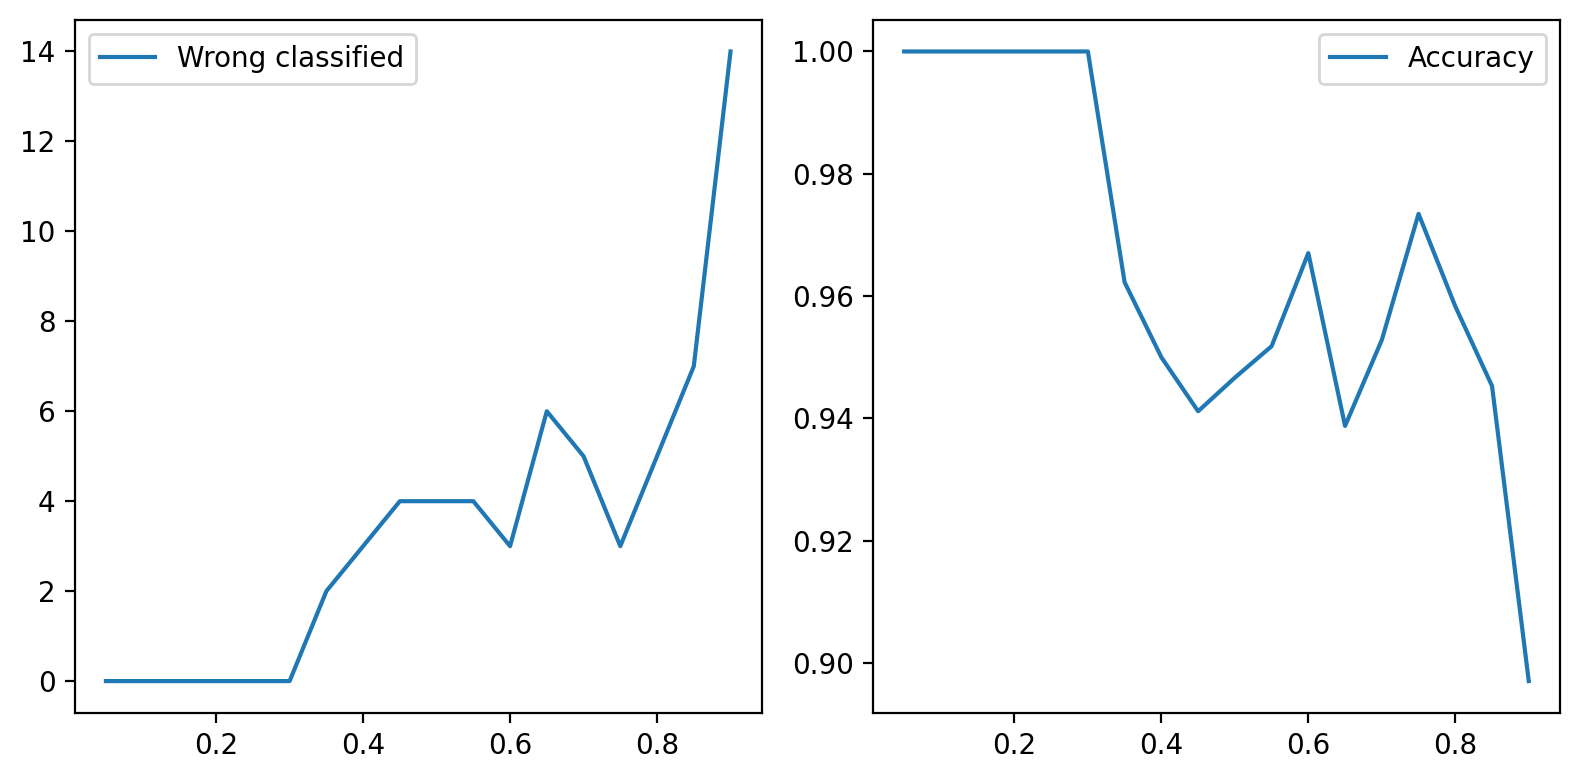

0
1.0


In [31]:
clf_svd = LinearDiscriminantAnalysis()
clf_lsqr = LinearDiscriminantAnalysis(solver="lsqr")
clf_eigen = LinearDiscriminantAnalysis(solver="eigen")

plot_clf(clf_svd)
plot_clf(clf_lsqr)
plot_clf(clf_eigen)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "


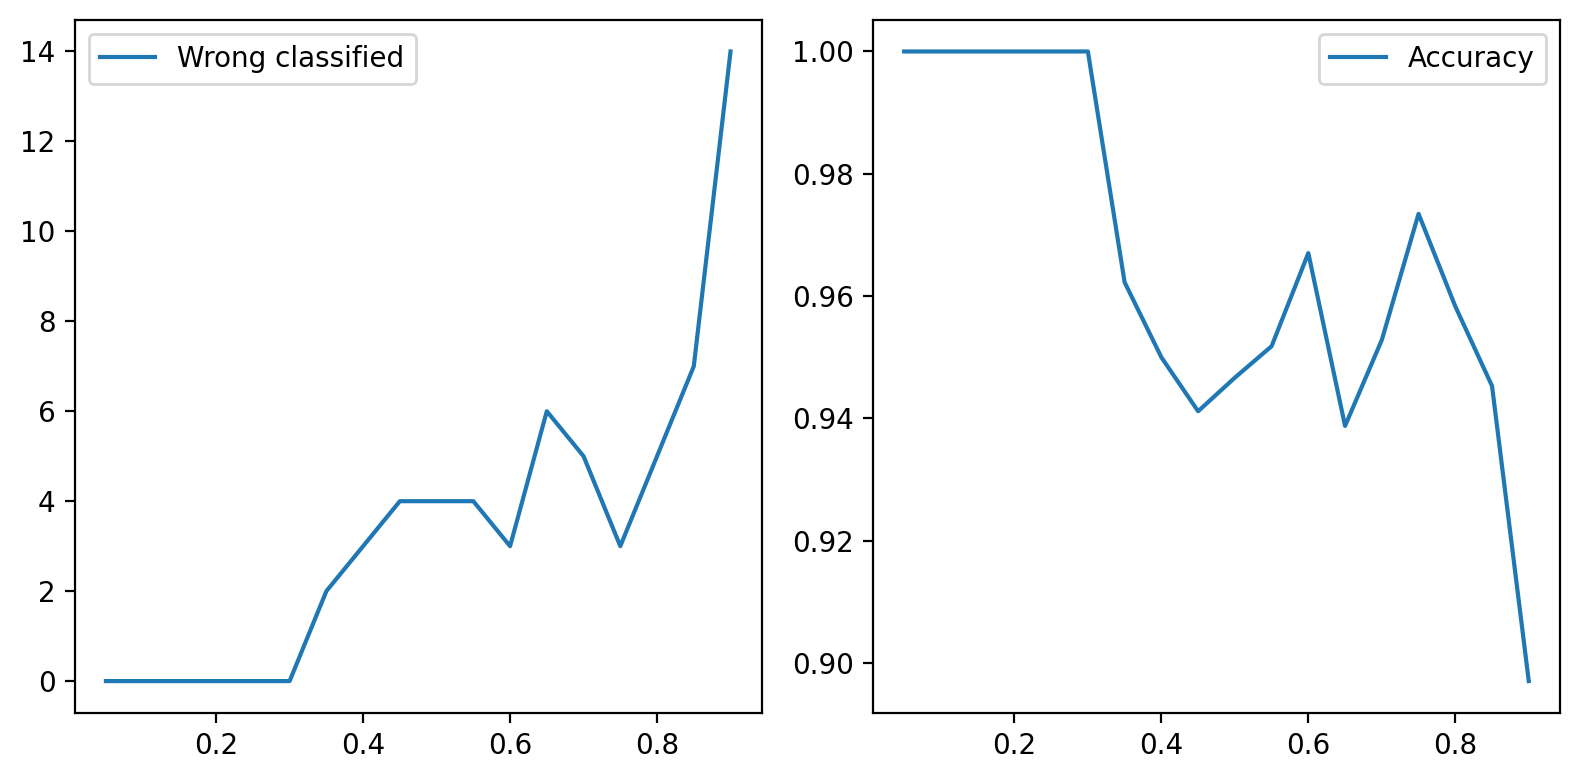

0
1.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "


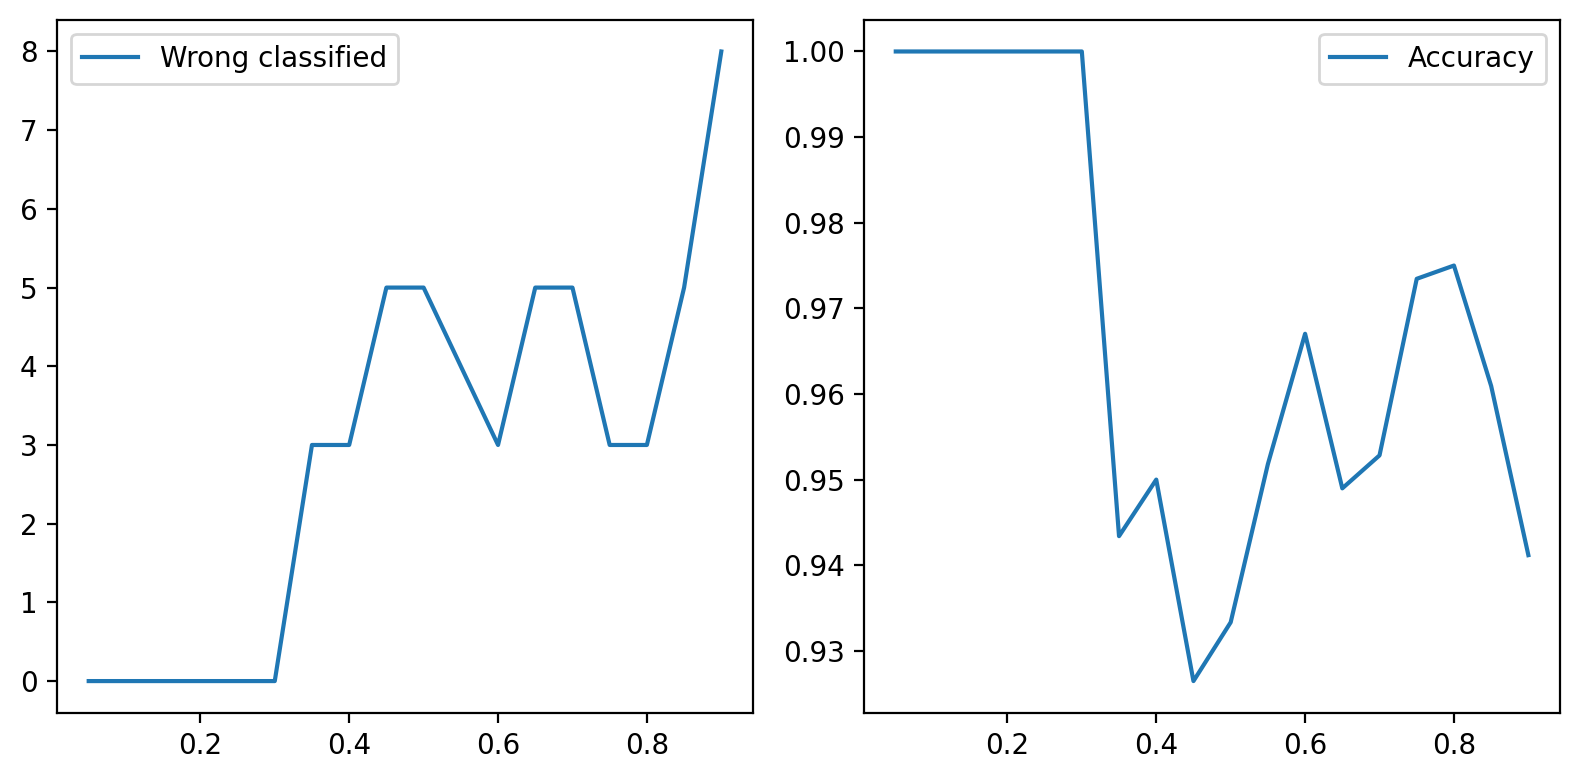

0
1.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "


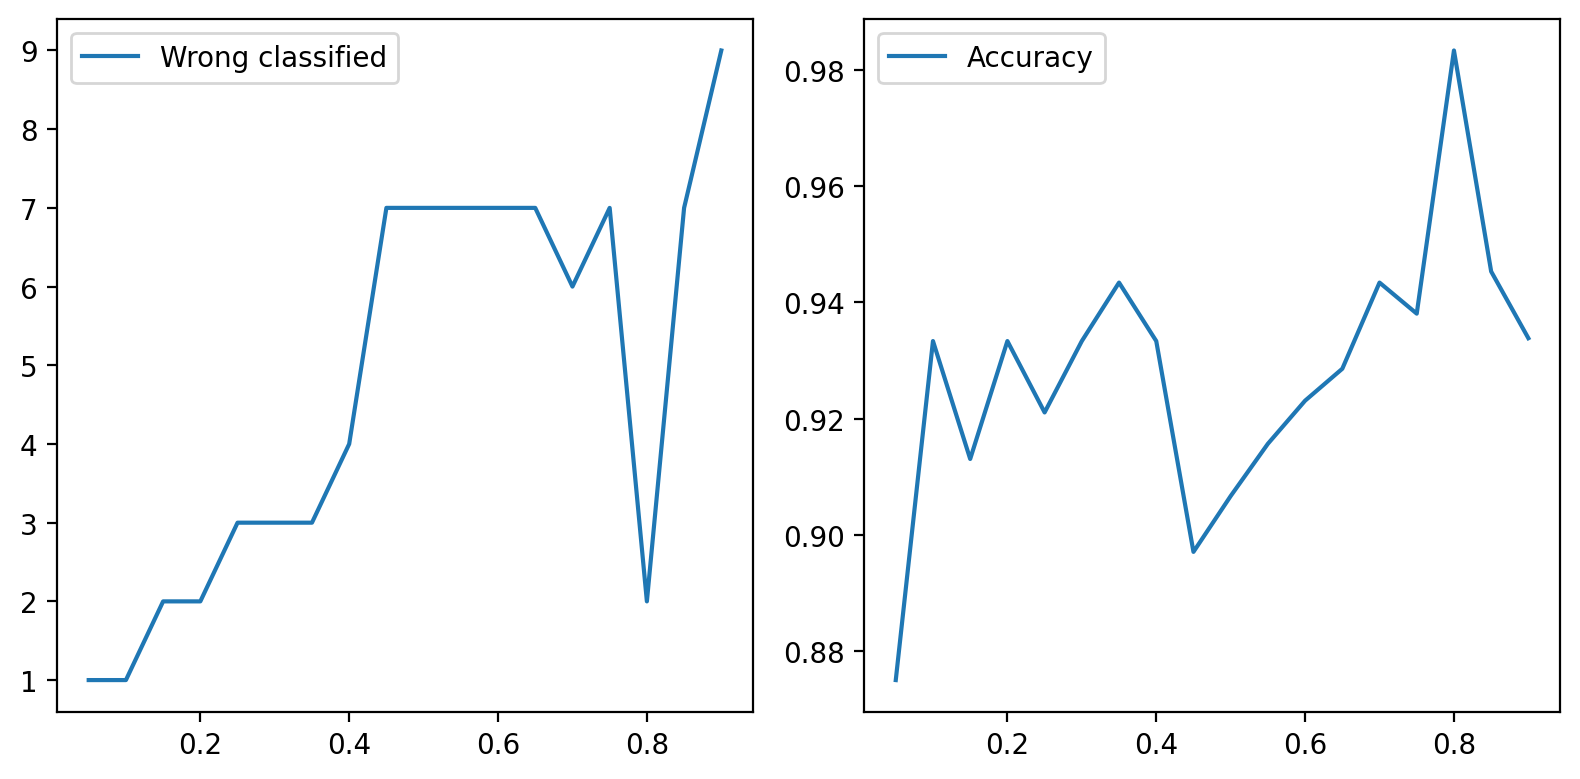

2
0.9833333333333333


/opt/anaconda3/lib/python3.7/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "


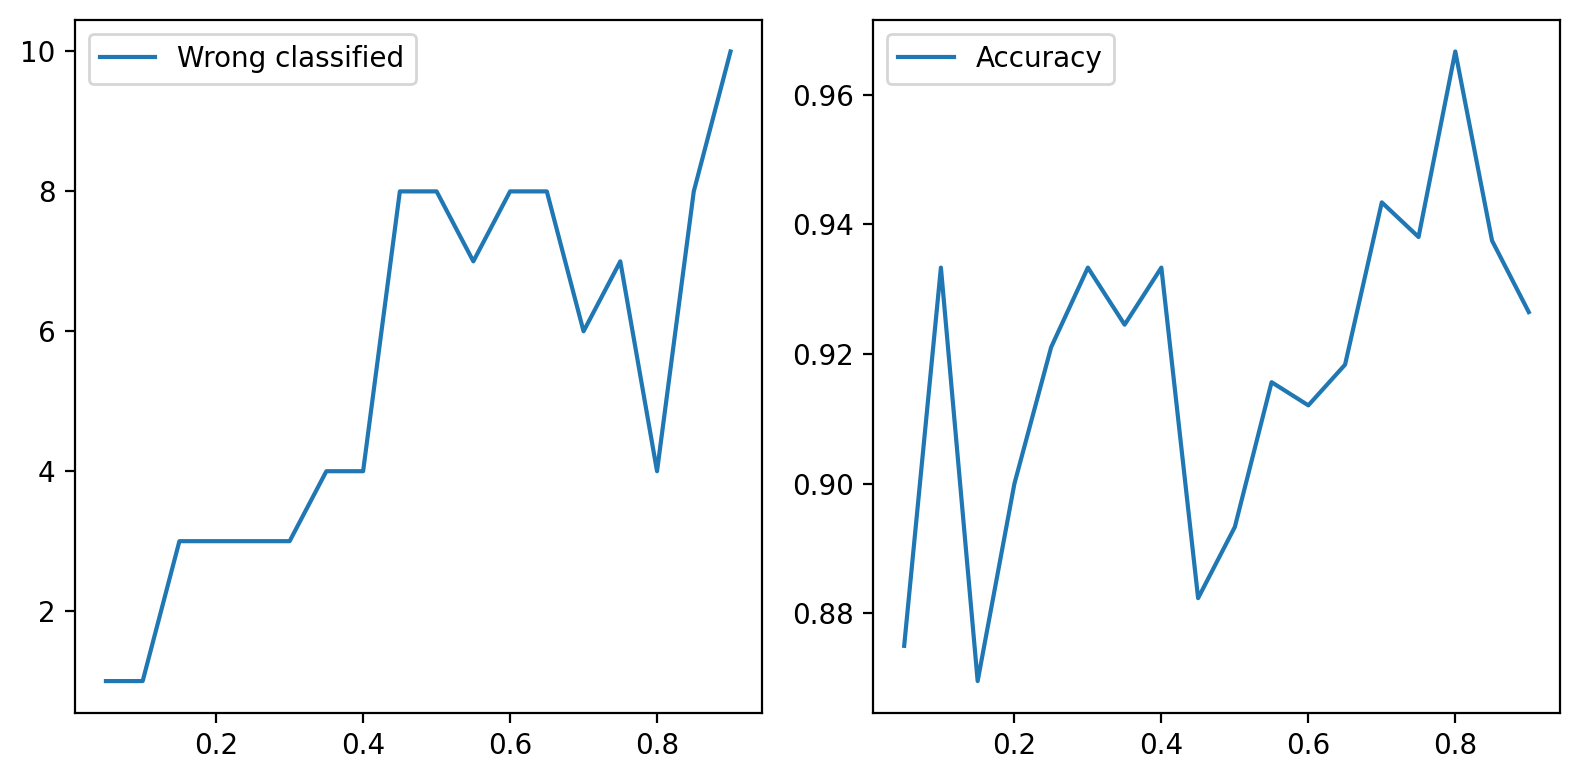

4
0.9666666666666667


/opt/anaconda3/lib/python3.7/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "


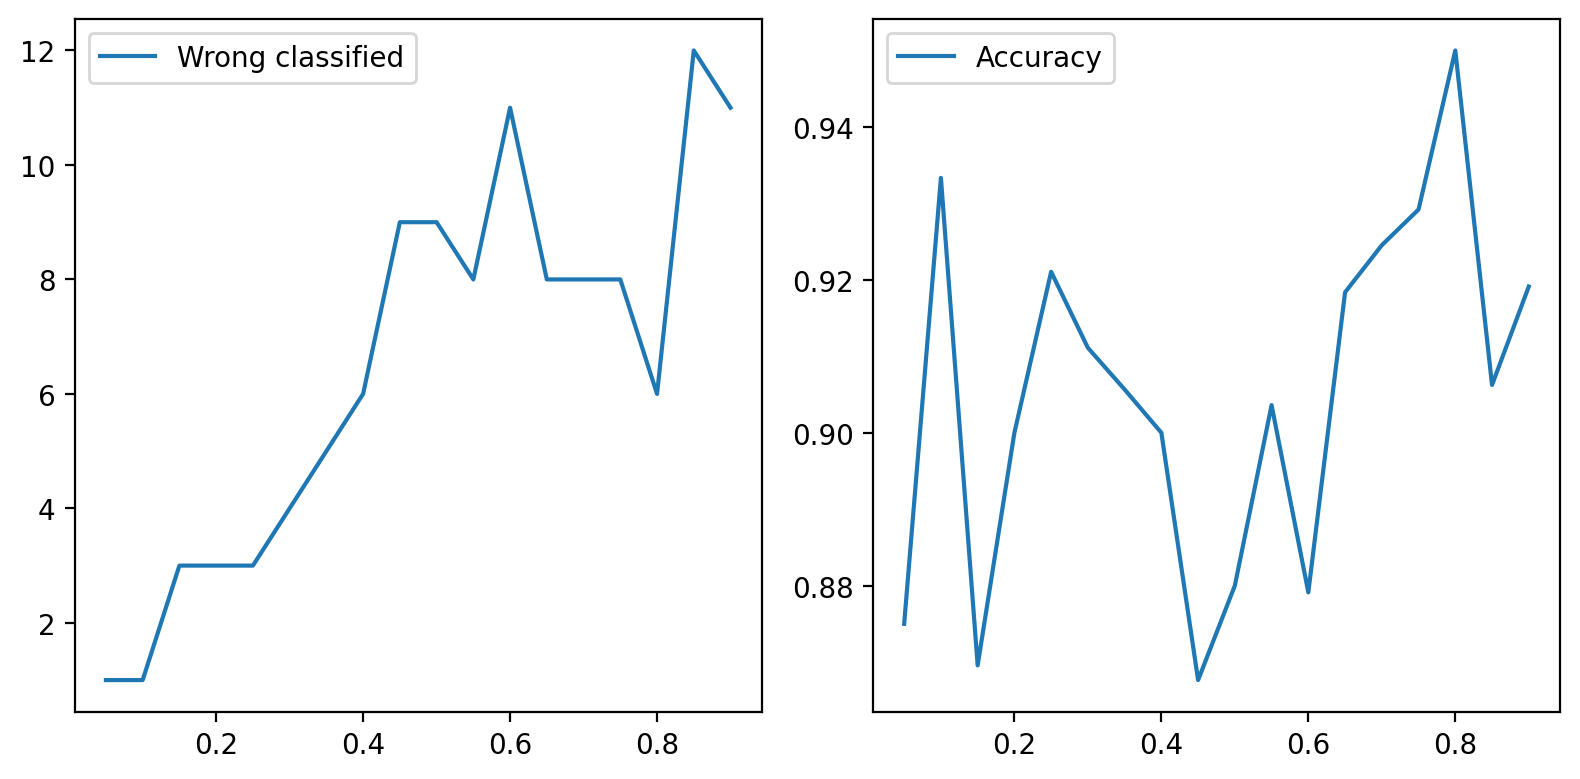

6
0.95


/opt/anaconda3/lib/python3.7/site-packages/sklearn/covariance/_shrunk_covariance.py:203: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "


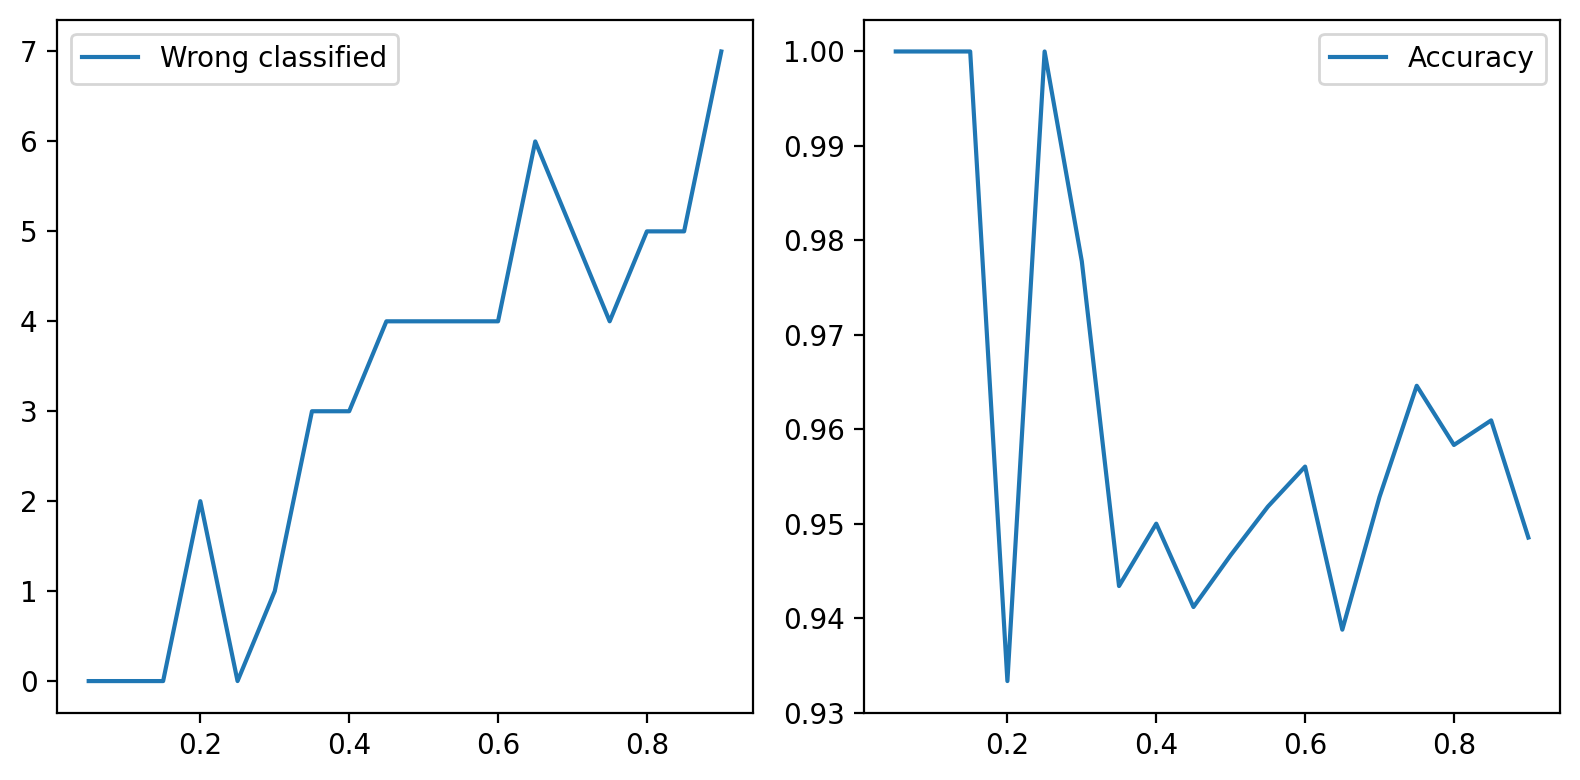

0
1.0


In [33]:
shrinkages = np.arange(0, 1, 0.2)
for shrinkage in shrinkages:
    clf_lsqr = LinearDiscriminantAnalysis(solver="lsqr", shrinkage=shrinkage)
    plot_clf(clf_lsqr)

clf_lsqr = LinearDiscriminantAnalysis(solver="lsqr", shrinkage="auto")
plot_clf(clf_lsqr)

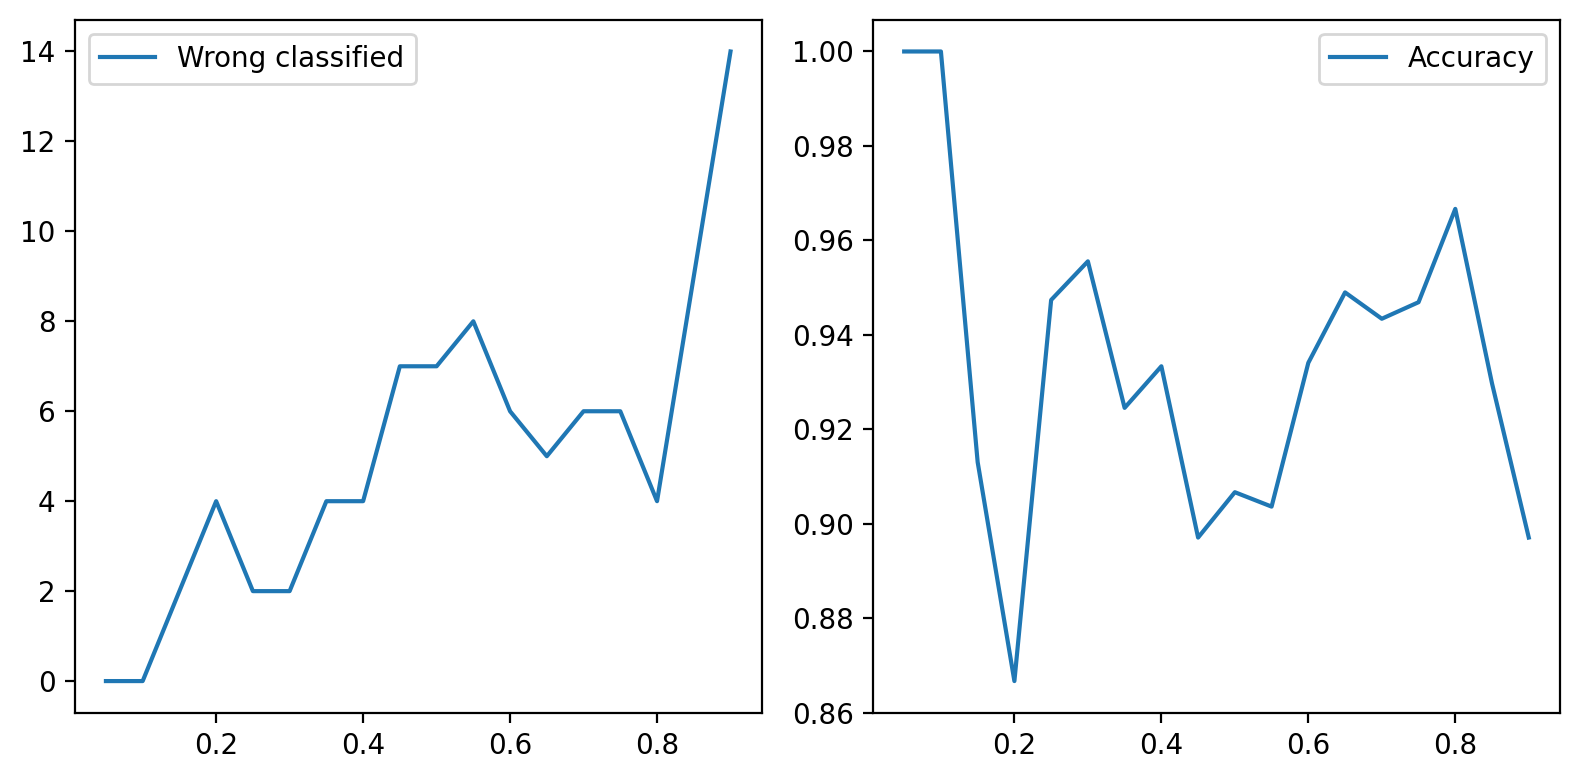

0
1.0


In [35]:
clf = LinearDiscriminantAnalysis(priors=[0.15, 0.7, 0.15])
plot_clf(clf)

In [38]:
clf = svm.SVC()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum())
print(clf.score(X, Y))

6
0.9466666666666667


In [39]:
print(clf.support_vectors_)
print(clf.support_)
print(clf.n_support_)

[[5.7 3.8 1.7 0.3]
 [5.4 3.4 1.7 0.2]
 [4.8 3.4 1.9 0.2]
 [5.1 3.3 1.7 0.5]
 [4.5 2.3 1.3 0.3]
 [5.6 2.9 3.6 1.3]
 [5.  2.  3.5 1. ]
 [6.8 2.8 4.8 1.4]
 [5.4 3.  4.5 1.5]
 [5.5 2.4 3.8 1.1]
 [6.7 3.  5.  1.7]
 [5.9 3.2 4.8 1.8]
 [6.2 2.9 4.3 1.3]
 [5.7 2.8 4.5 1.3]
 [6.1 3.  4.6 1.4]
 [6.  3.4 4.5 1.6]
 [6.6 3.  4.4 1.4]
 [5.6 3.  4.5 1.5]
 [6.2 2.2 4.5 1.5]
 [6.6 2.9 4.6 1.3]
 [5.2 2.7 3.9 1.4]
 [6.7 3.1 4.4 1.4]
 [6.  2.9 4.5 1.5]
 [6.7 3.3 5.7 2.1]
 [6.7 3.  5.2 2.3]
 [6.1 2.6 5.6 1.4]
 [6.2 3.4 5.4 2.3]
 [5.7 2.5 5.  2. ]
 [6.9 3.1 5.1 2.3]
 [5.9 3.  5.1 1.8]
 [5.8 2.7 5.1 1.9]
 [5.8 2.7 5.1 1.9]
 [6.9 3.1 5.4 2.1]
 [6.4 3.1 5.5 1.8]
 [6.  3.  4.8 1.8]
 [6.4 2.7 5.3 1.9]
 [7.7 3.8 6.7 2.2]
 [6.3 2.5 5.  1.9]]
[ 7 14 31 67 68  0  3  4 10 22 25 26 28 29 39 41 47 50 52 56 65 73 74  5
 13 15 16 17 32 34 36 43 45 55 57 58 64 71]
[ 5 18 15]


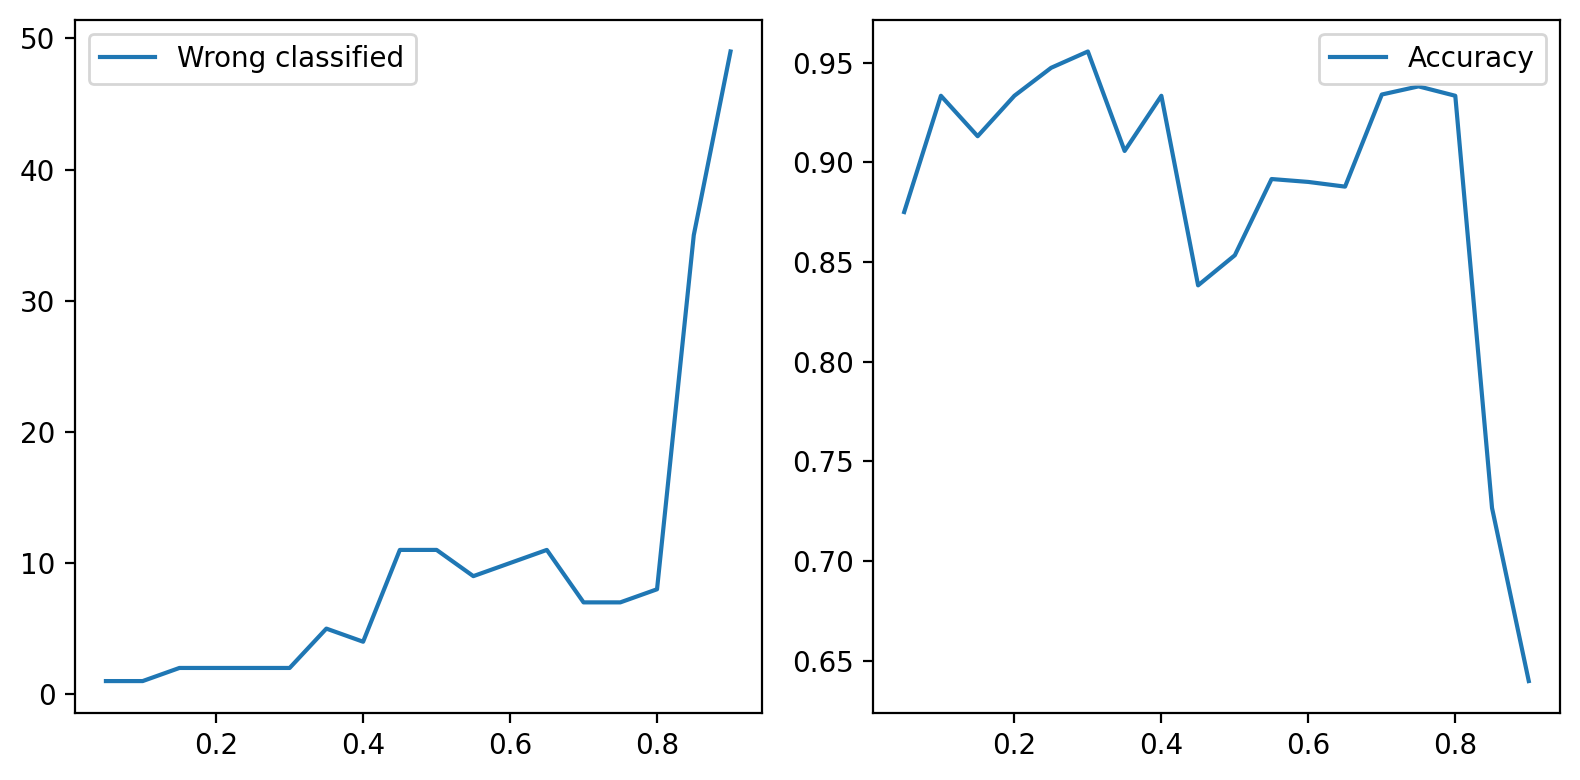

2
0.9555555555555556


In [40]:
plot_clf(clf)

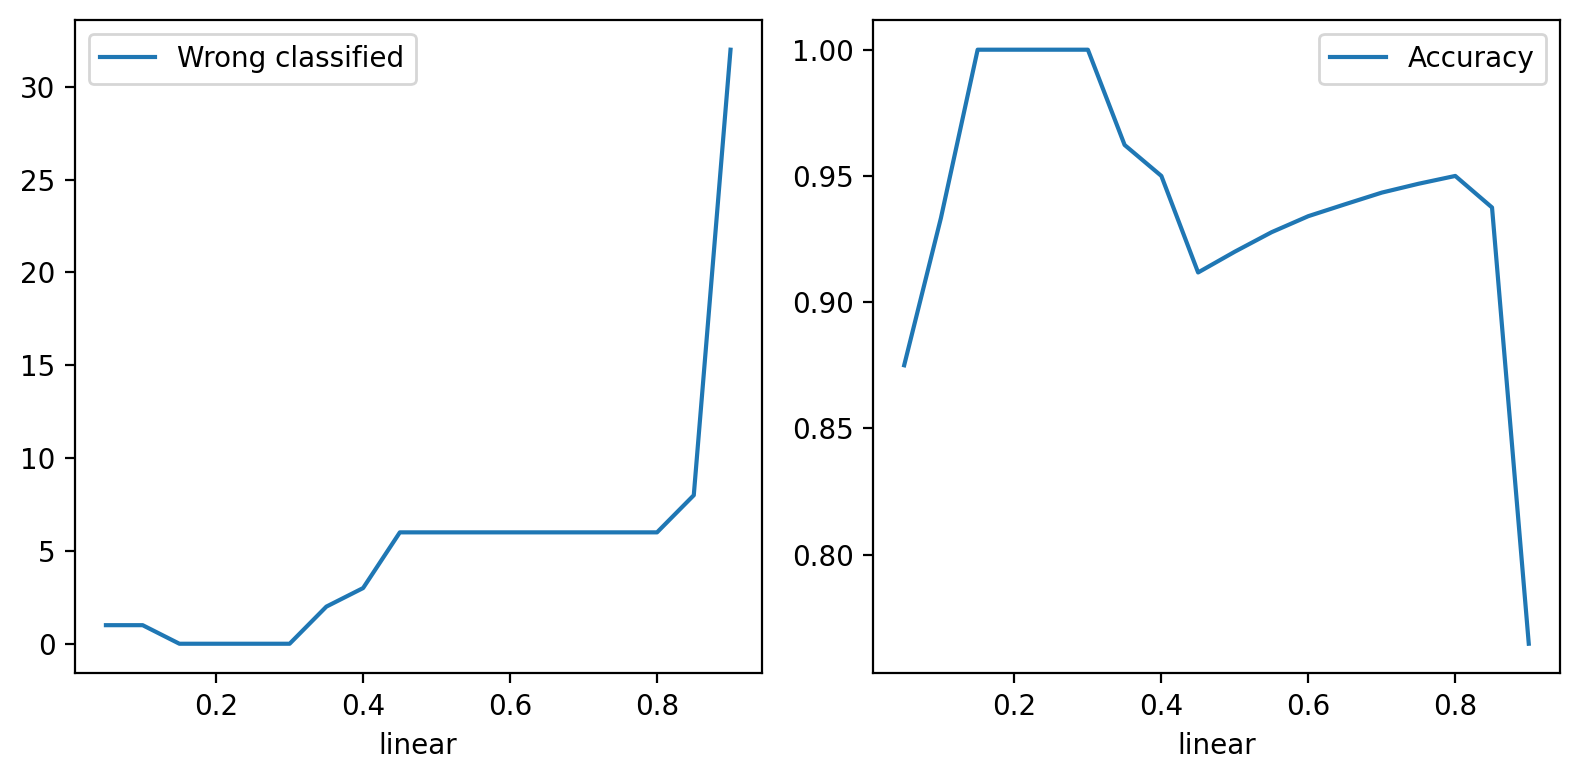

0
1.0


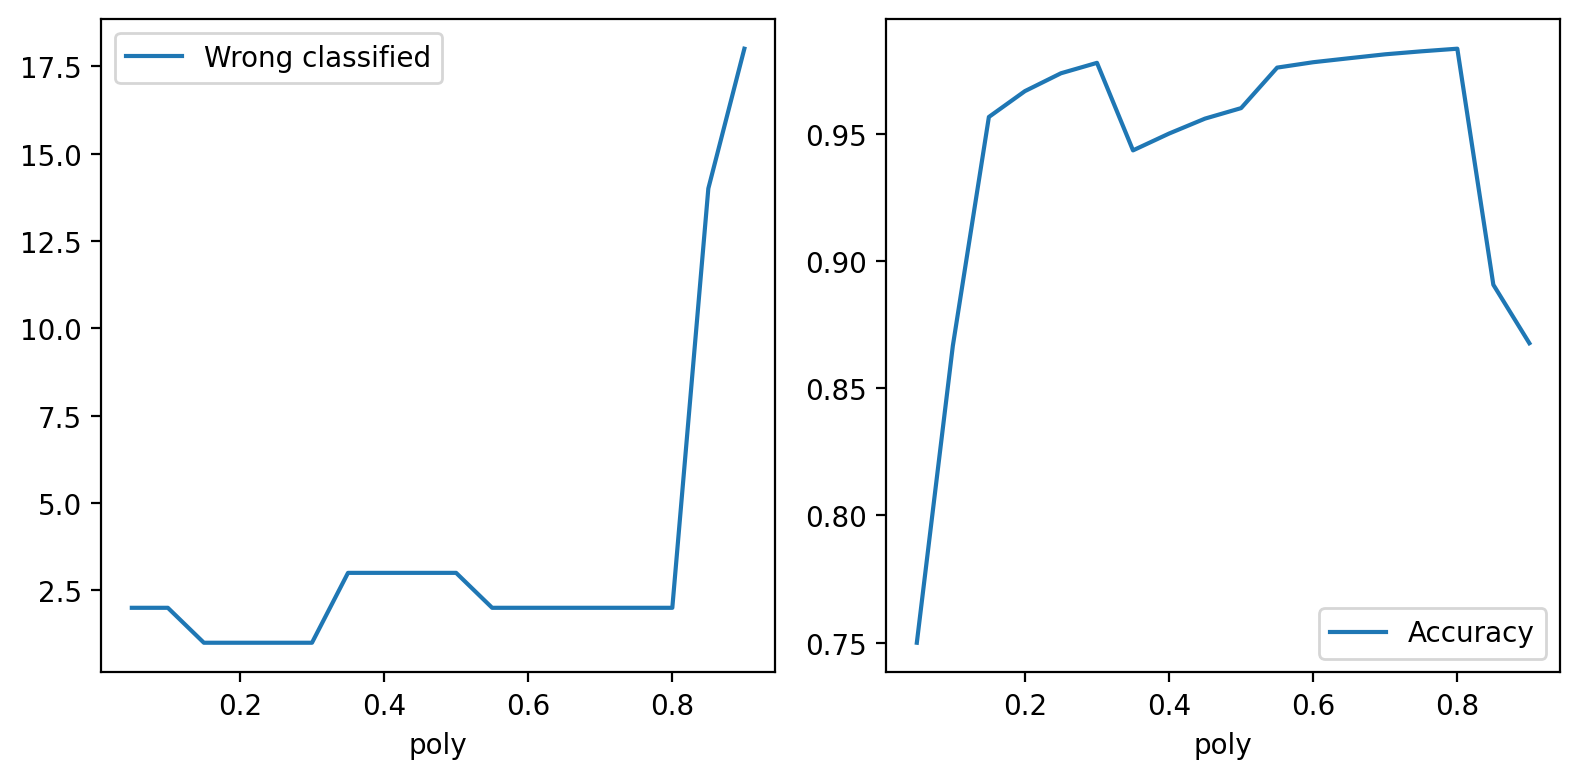

2
0.9833333333333333


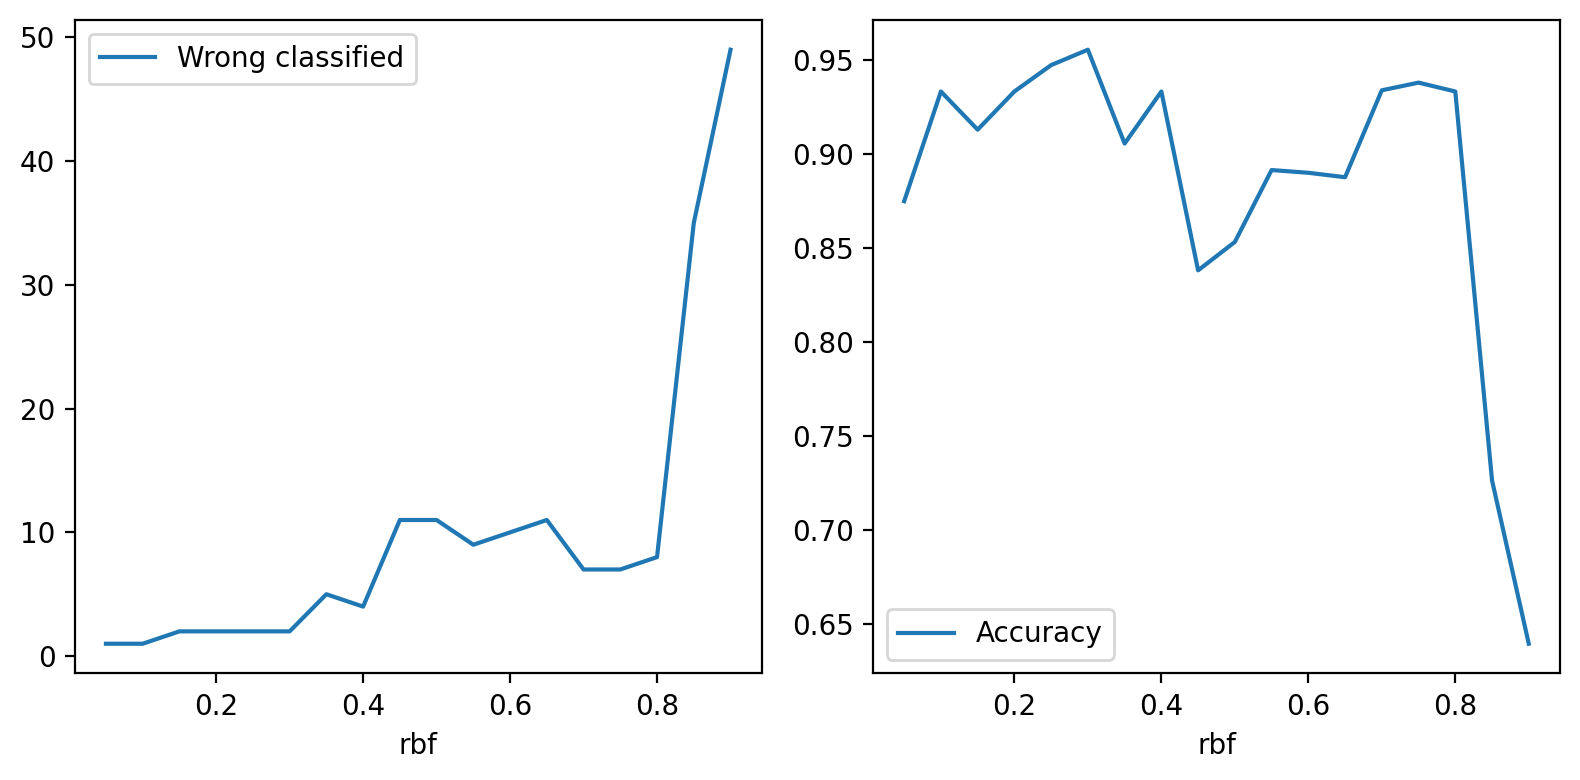

2
0.9555555555555556


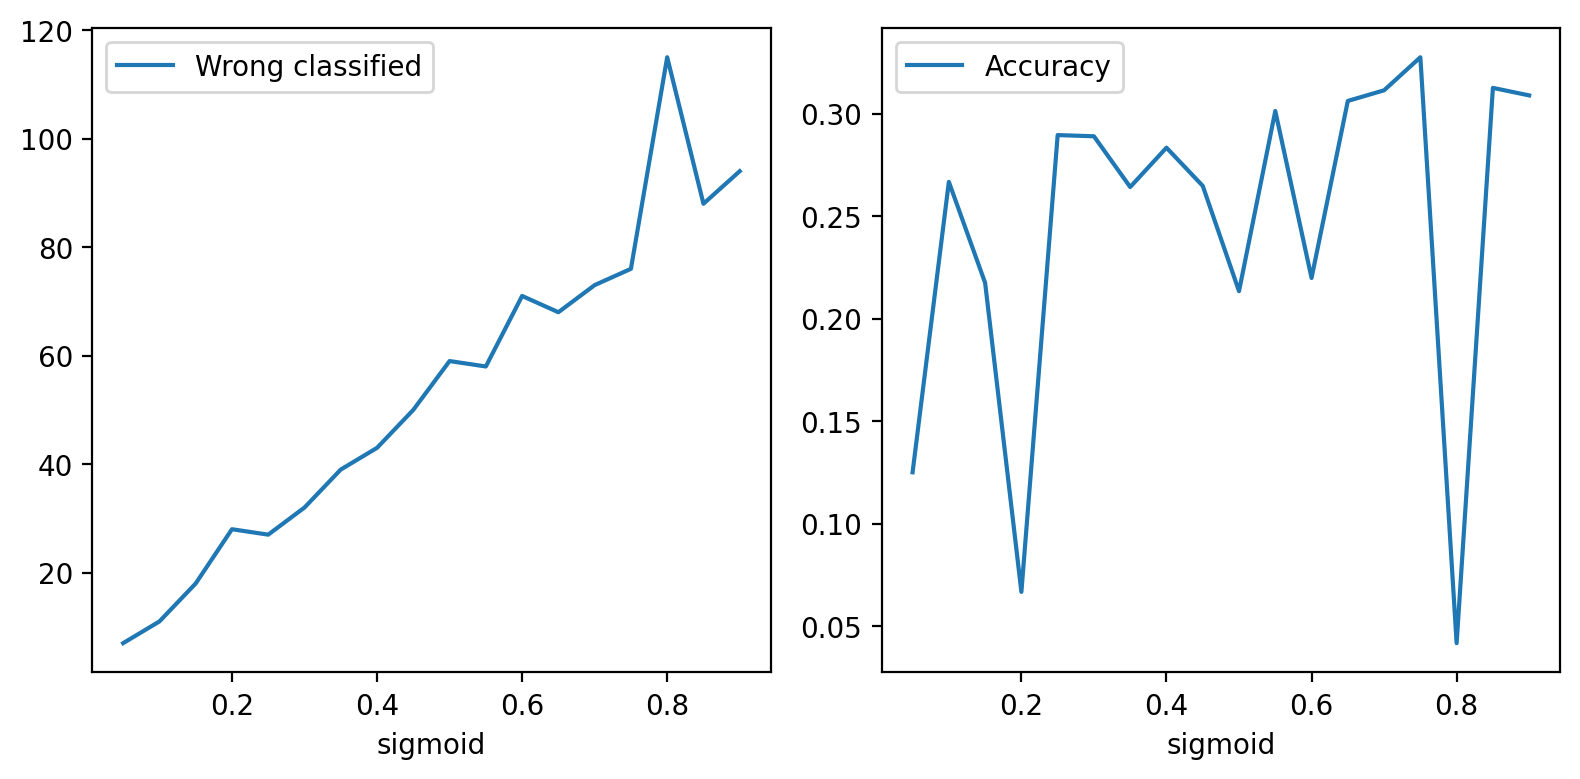

76
0.3274336283185841


In [42]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    clf = svm.SVC(kernel=kernel)
    plot_clf(clf, kernel)

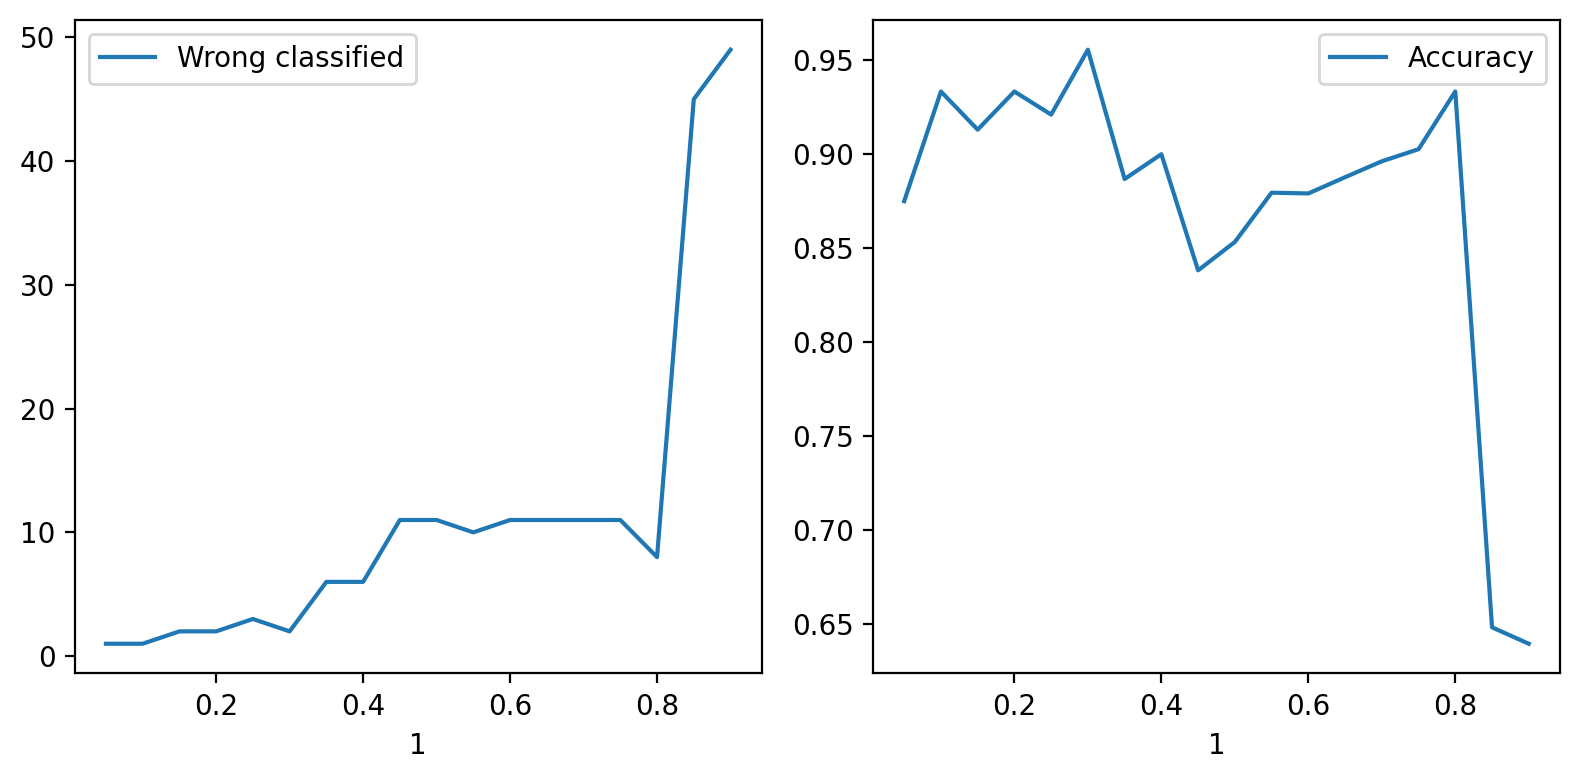

2
0.9555555555555556


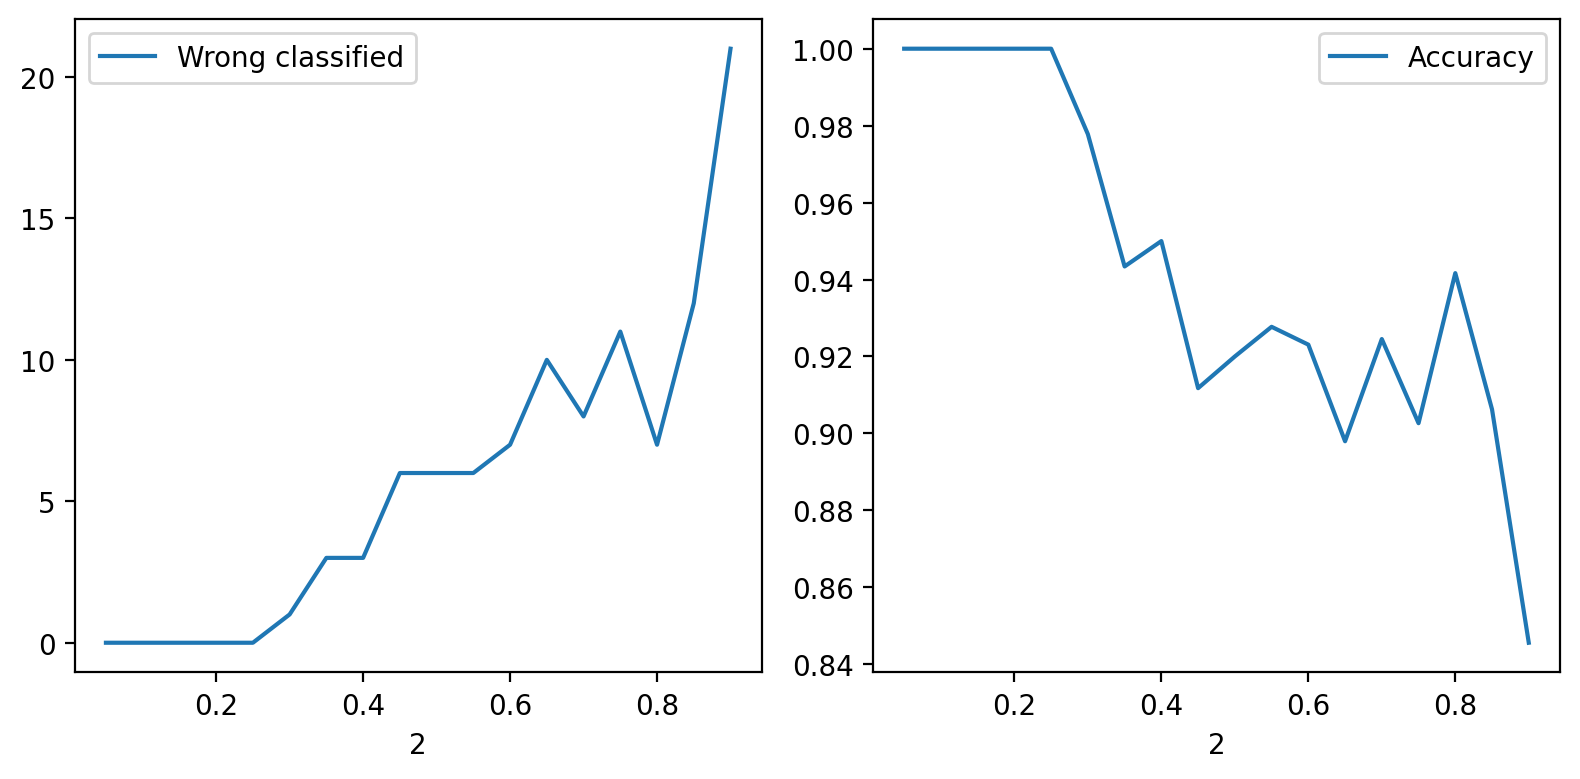

0
1.0


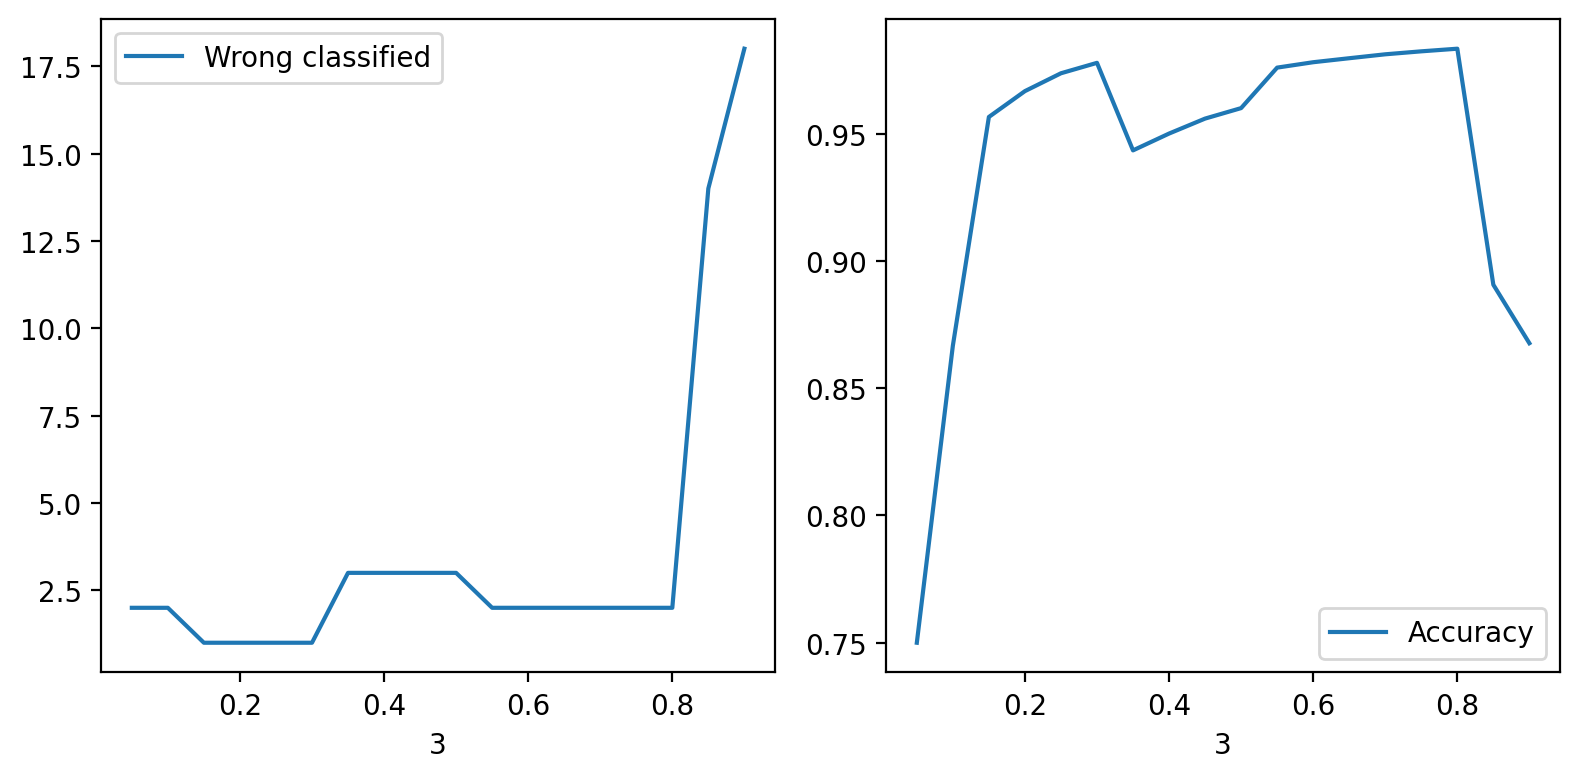

2
0.9833333333333333


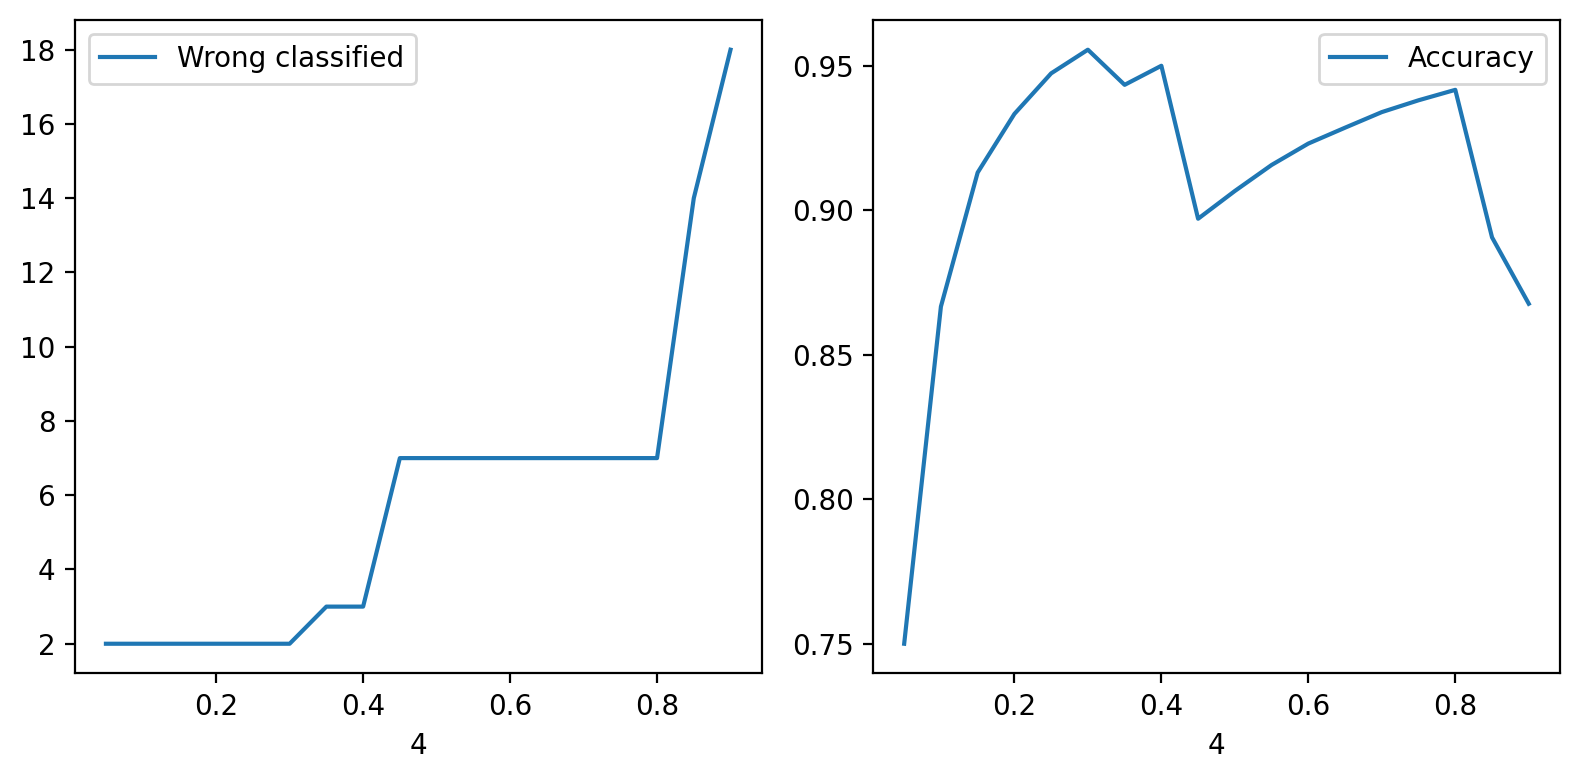

2
0.9555555555555556


In [44]:
degrees = np.arange(1, 5, 1)

for degree in degrees:
    clf = svm.SVC(degree=degree, kernel="poly")
    plot_clf(clf, degree)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklea

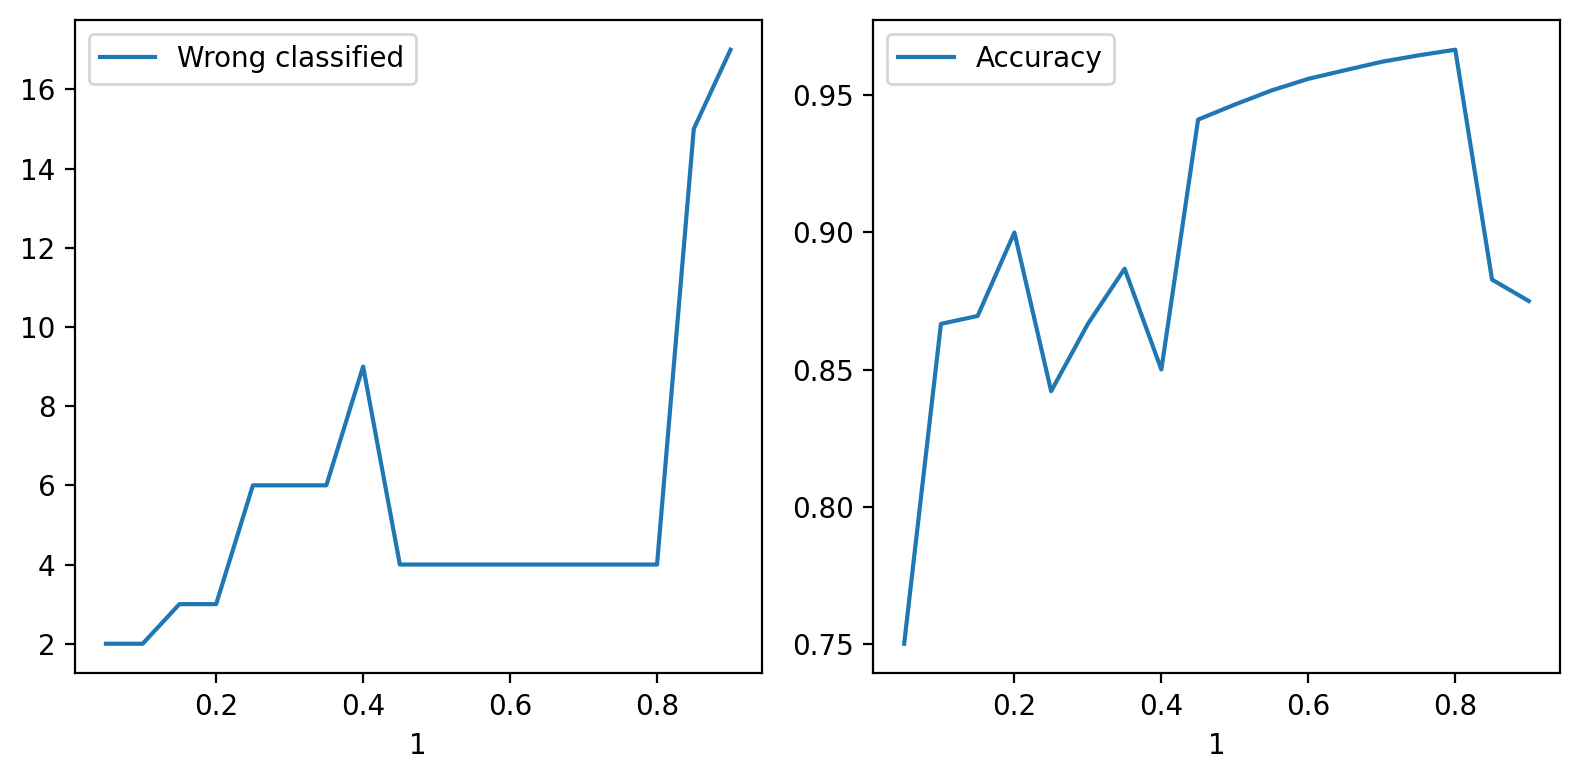

4
0.9666666666666667


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklea

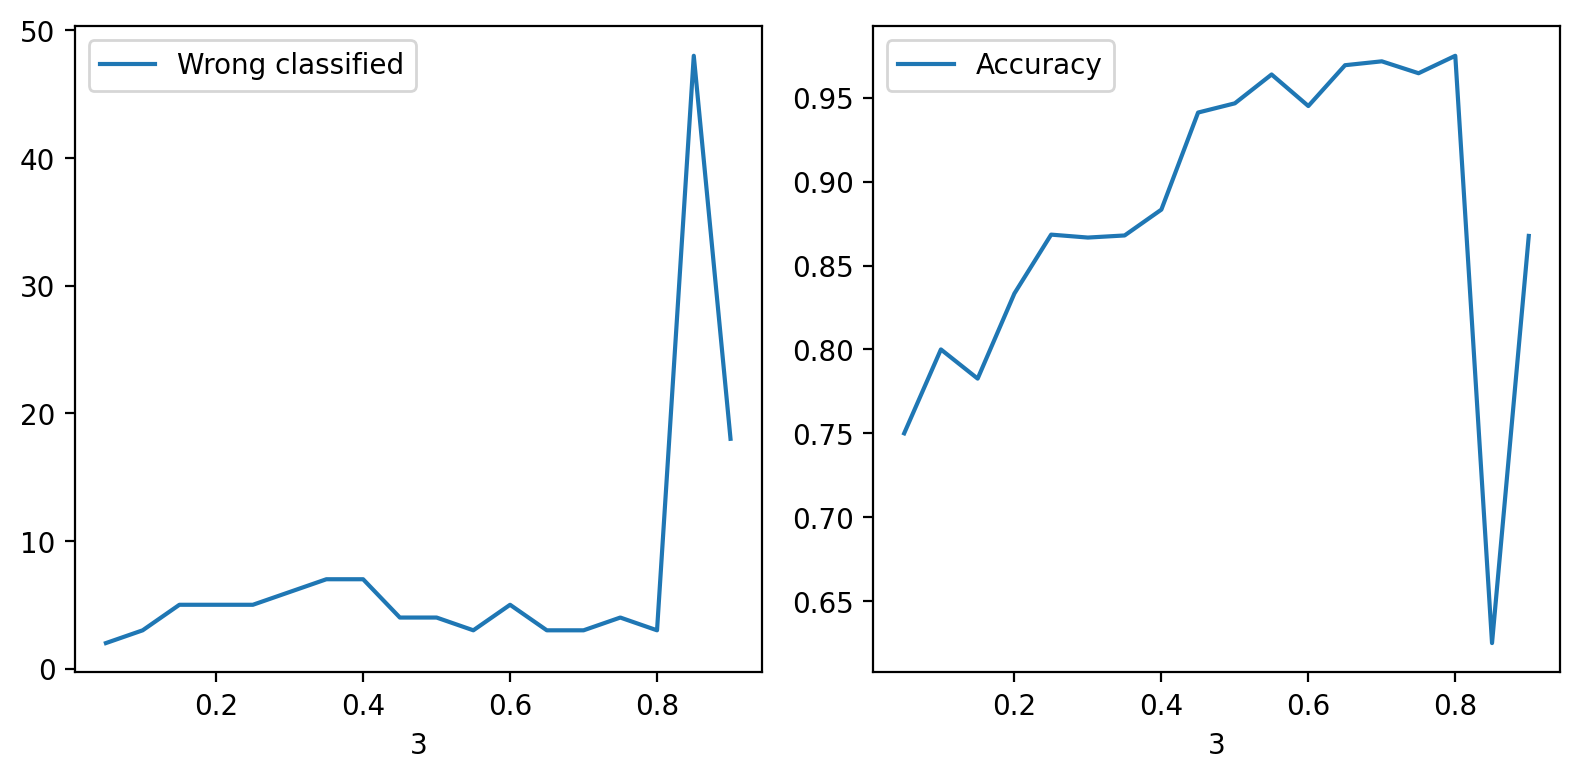

3
0.975


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklea

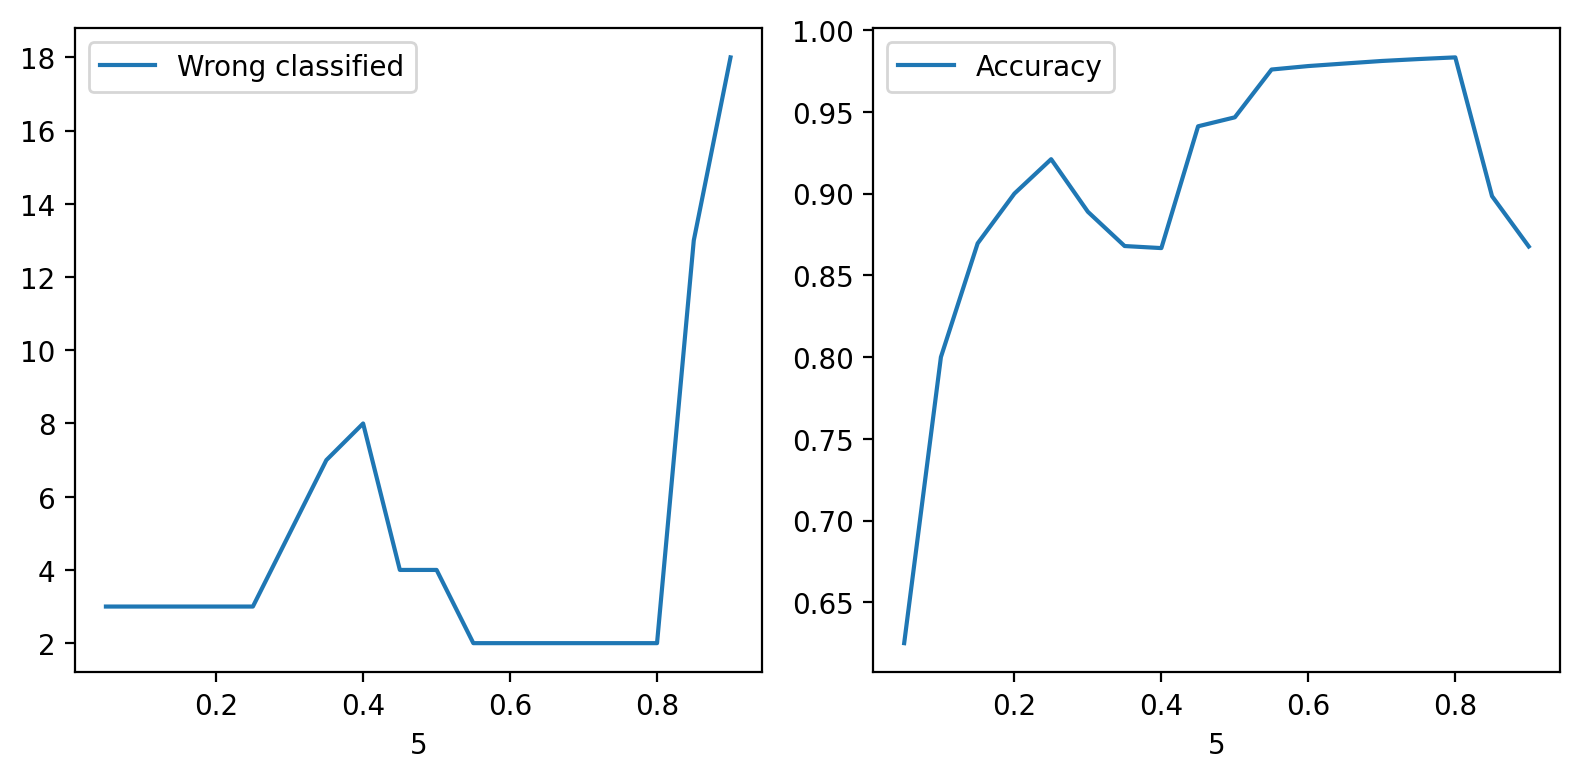

2
0.9833333333333333


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=7).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=7).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=7).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=7).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklea

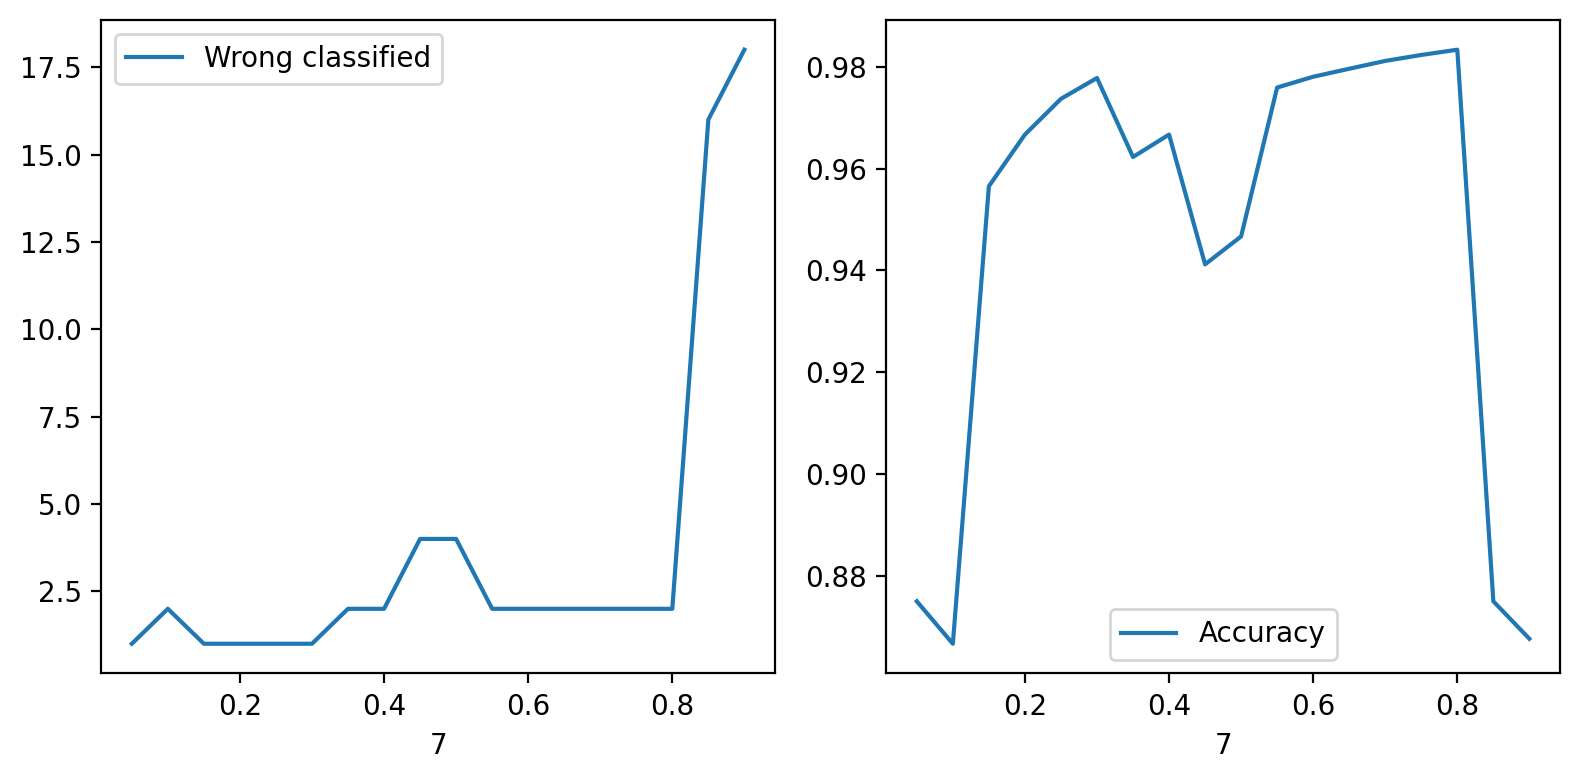

2
0.9833333333333333


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=9).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=9).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=9).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=9).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklea

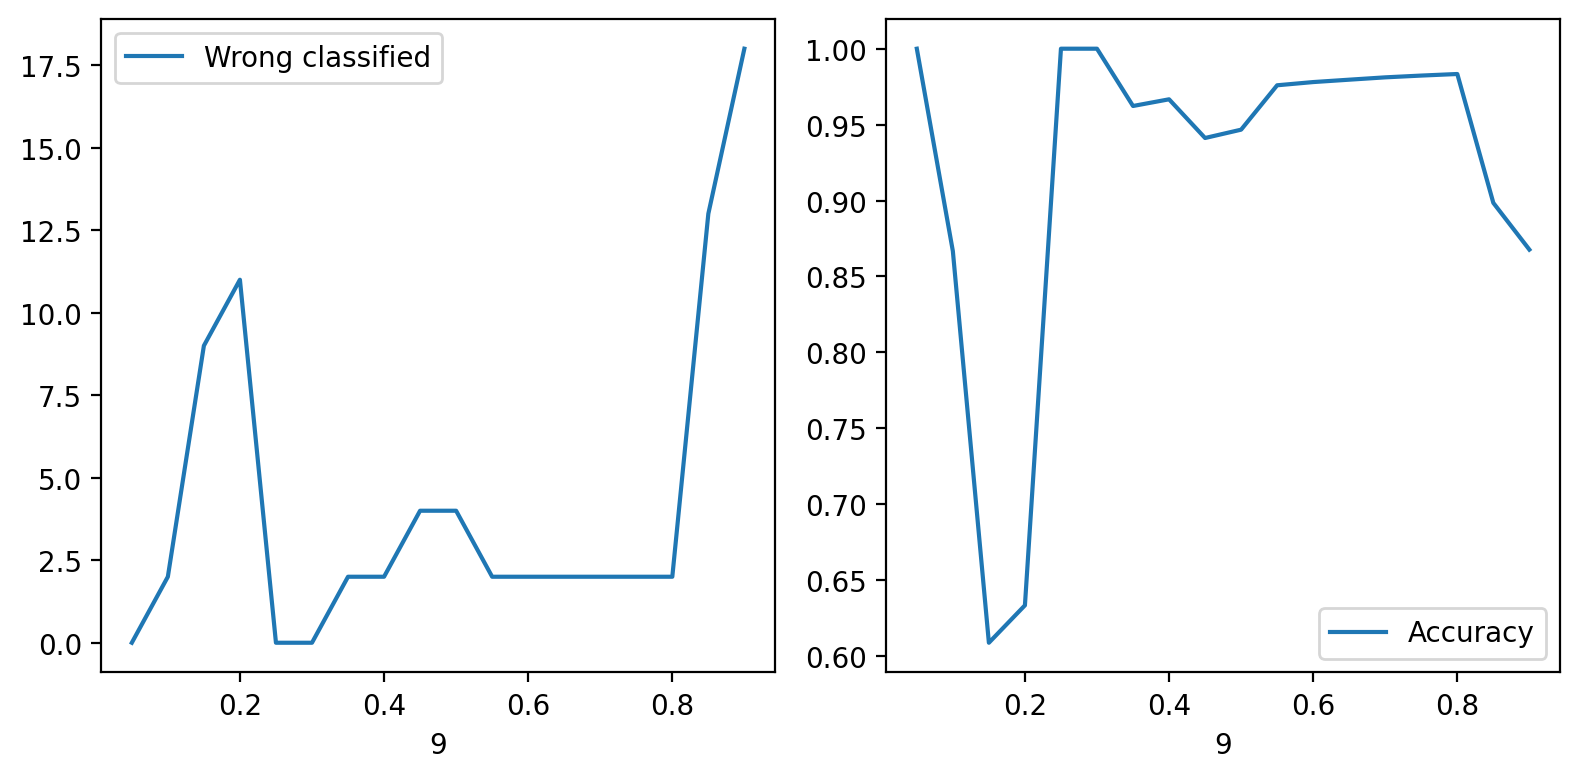

0
1.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=11).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=11).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=11).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=11).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/s

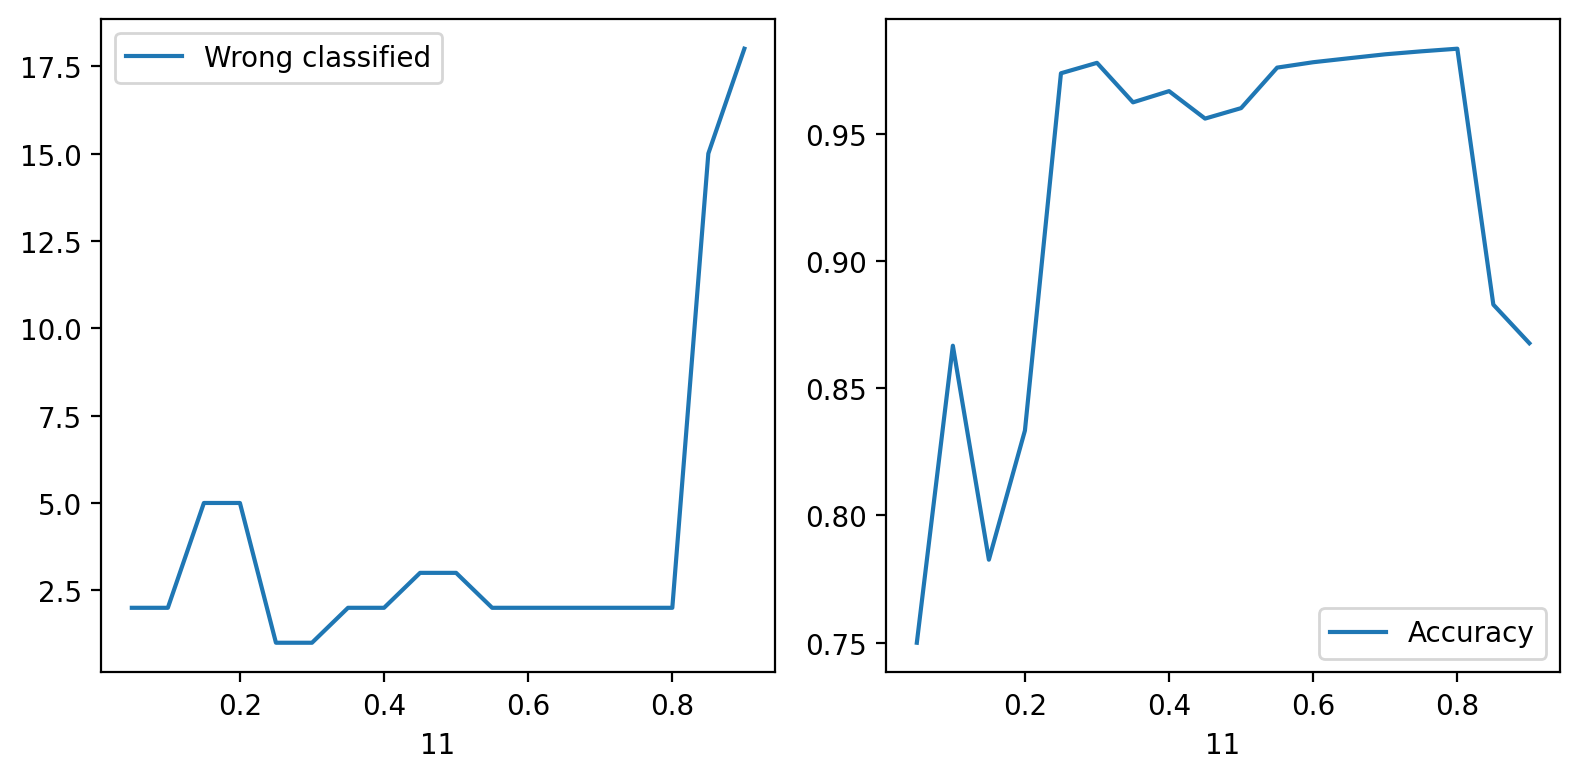

2
0.9833333333333333


In [45]:
max_iters = np.arange(1, 13, 2)

for max_iter in max_iters:
    clf = svm.SVC(max_iter=max_iter, kernel="poly")
    plot_clf(clf, max_iter)

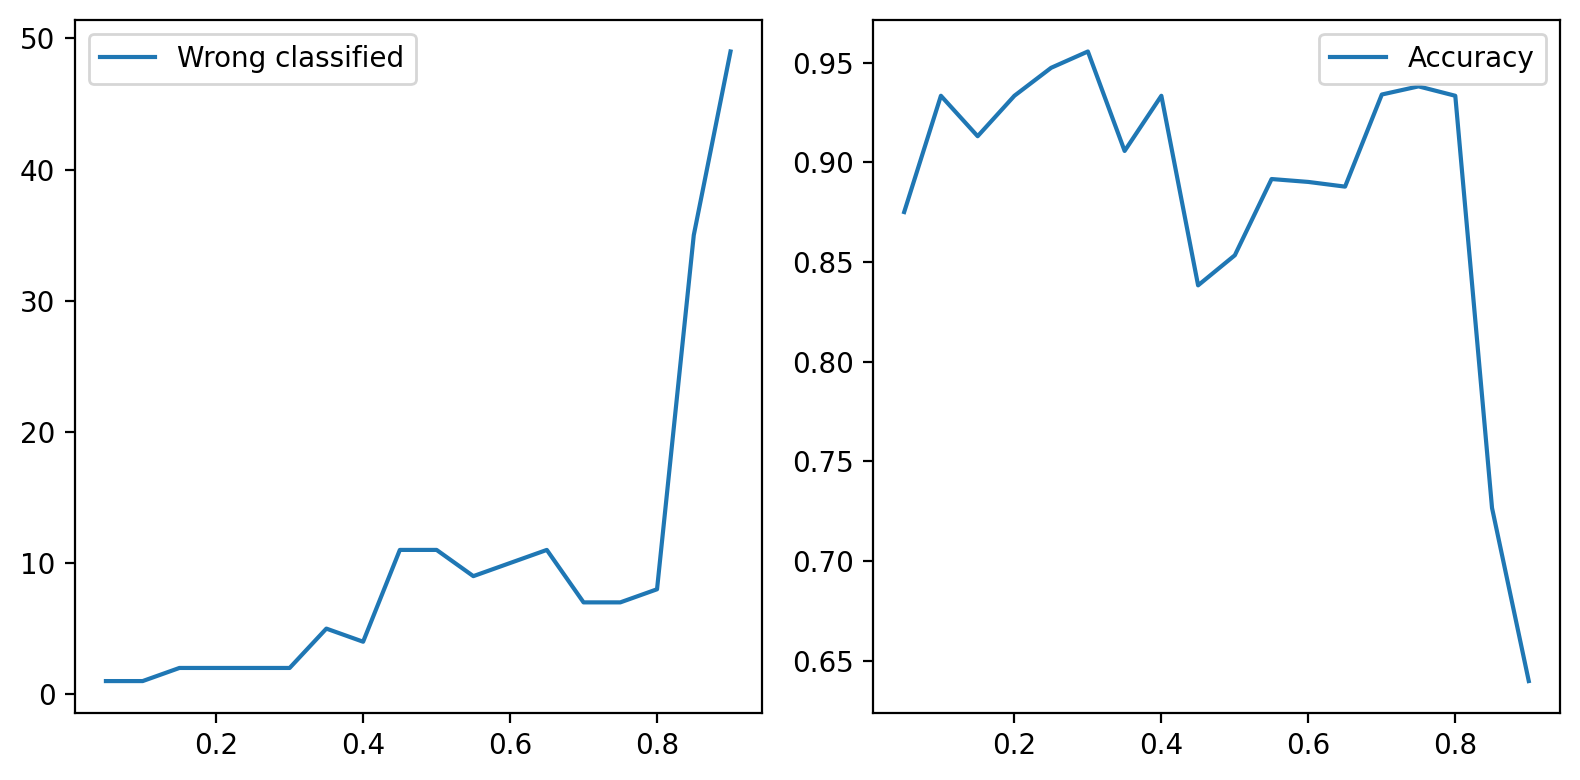

2
0.9555555555555556


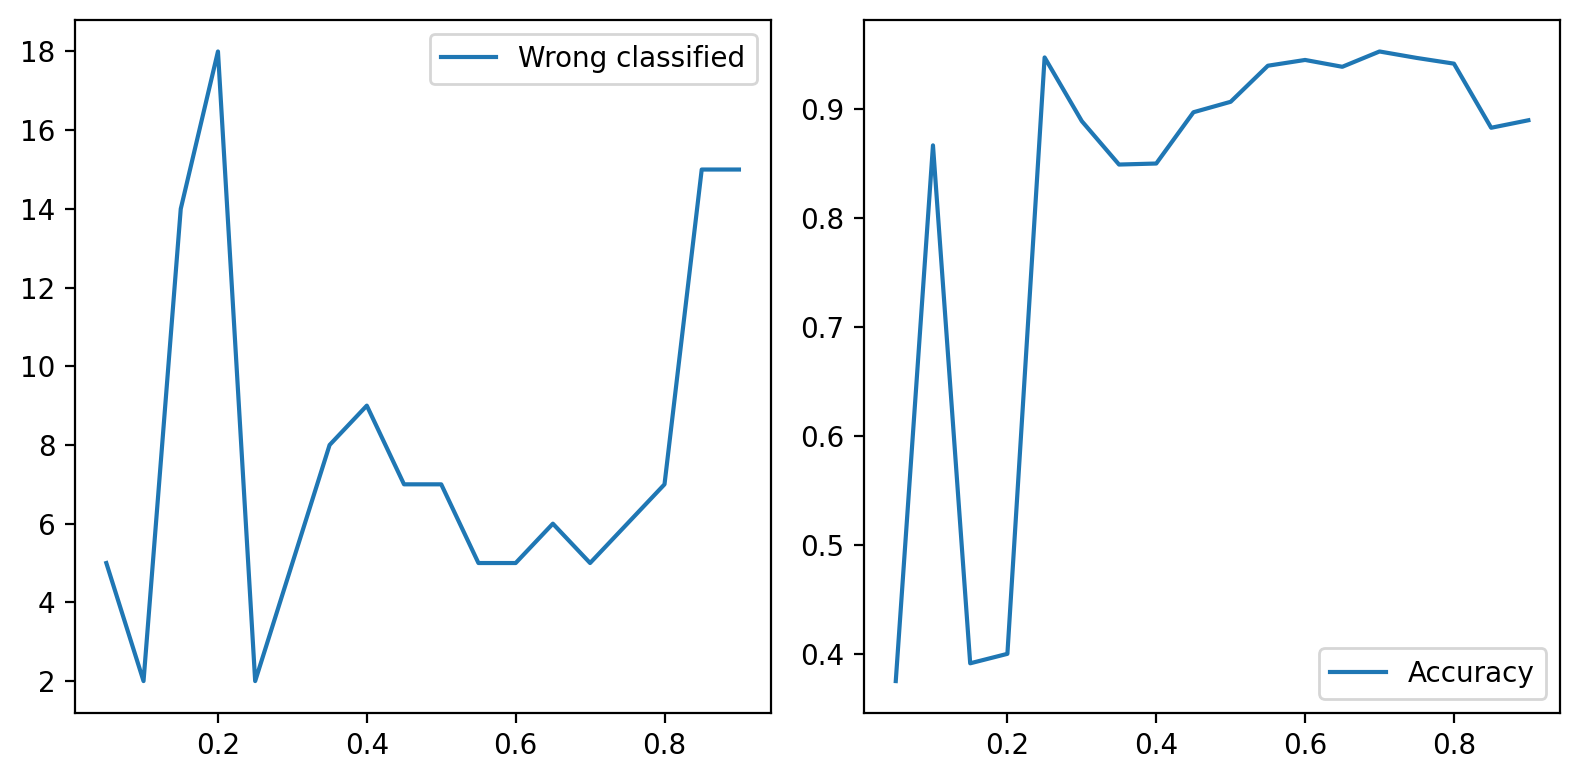

5
0.9528301886792453


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

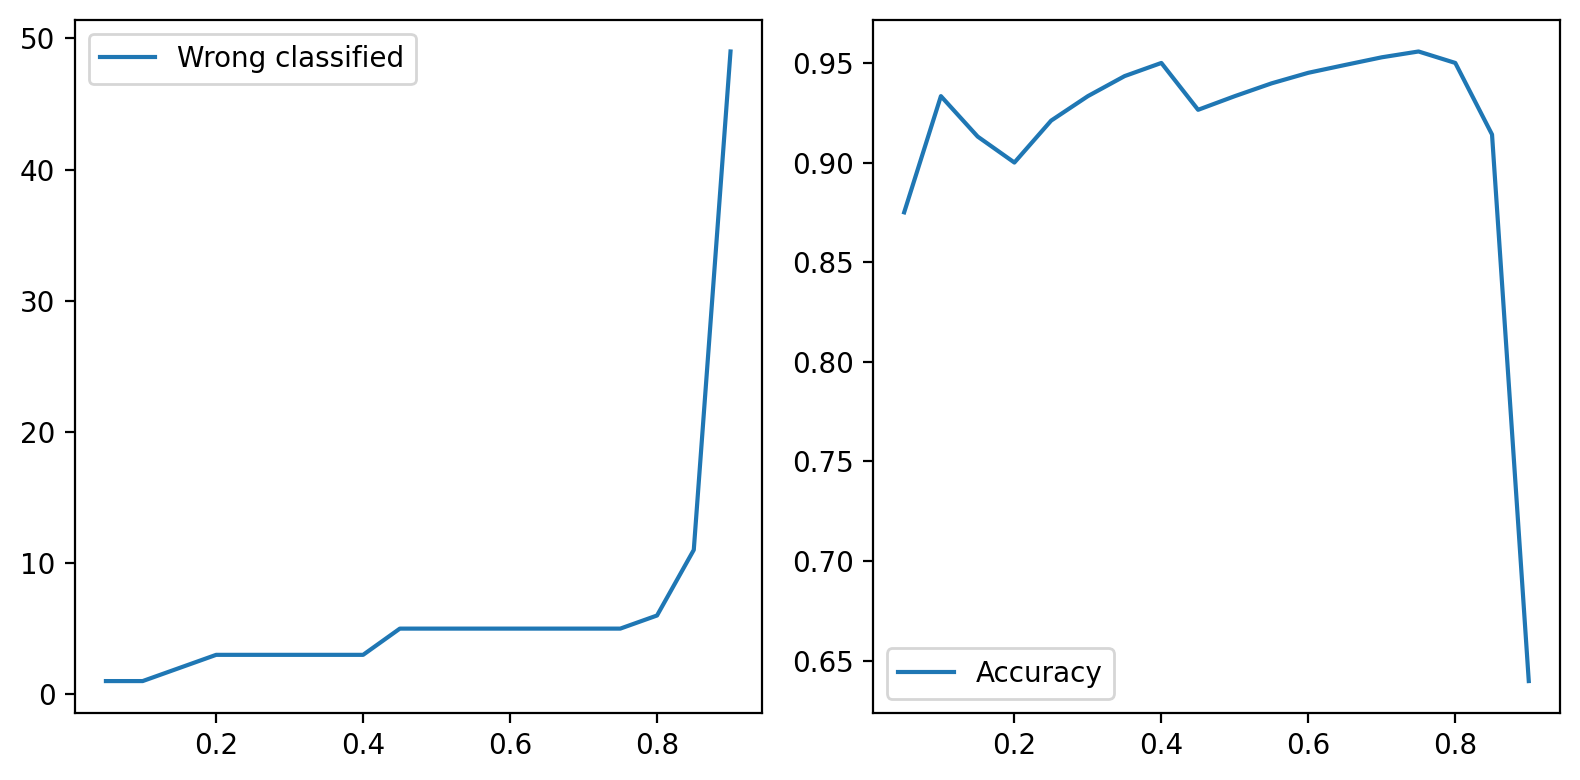

5
0.9557522123893806


In [49]:
clf_svc = svm.SVC()
clf_nusvc = svm.NuSVC(nu=0.01)
clf_lsvc = svm.LinearSVC()

plot_clf(clf_svc)
plot_clf(clf_nusvc)
plot_clf(clf_lsvc)